In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import uniform, randint, loguniform
import os  # Á°Æ‰øùÂØºÂÖ•osÊ®°Âùó

In [2]:
# Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ
data = pd.read_excel('data/CO2_20250208.xlsx', sheet_name='CO2 solubility data')

In [3]:
data.head(8)

No.                  IL  x_CO2 (mol/kg sorbent)   T (K)  P (bar)  IF1  IF2  \
0    1  [Bis(mim)C2][Gly]2                  0.8504  313.15   0.1154    2    0   
1    2  [Bis(mim)C2][Gly]2                  1.1442  313.15   0.2692    2    0   
2    3  [Bis(mim)C2][Gly]2                  1.4535  313.15   0.5385    2    0   
3    4  [Bis(mim)C2][Gly]2                  2.3503  313.15   0.8462    2    0   
4    5  [Bis(mim)C2][Gly]2                  2.4895  313.15   1.3077    2    0   
5    6  [Bis(mim)C2][Gly]2                  2.5823  313.15   1.7308    2    0   
6    7  [Bis(mim)C2][Gly]2                  2.6132  313.15   2.0000    2    0   
7    8  [Bis(mim)C2][Gly]2                  2.6441  313.15   2.9615    2    0   

   IF3  IF4  IF5  ...  IF35  IF36  IF37  IF38  IF39  IF40  IF41  IF42  IF43  \
0    0    0    0  ...     0     0     0     0     0     0     0     0     0   
1    0    0    0  ...     0     0     0     0     0     0     0     0     0   
2    0    0    0  ...     0     0     0     0     0     0     0     0     0   
3    0    0    0  ...     0     0     0     0     0     0     0     0     0   
4    0    0    0  ...     0     0     0     0     0     0     0     0     0   
5    0    0    0  ...     0     0     0     0     0     0     0     0     0   
6    0    0    0  ...     0     0     0     0     0     0     0     0     0   
7    0    0    0  ...     0     0     0     0     0     0     0     0     0   

   IF44  
0     0  
1     0  
2     0  
3     0  
4     0  
5     0  
6     0  
7     0  

[8 rows x 49 columns]

In [4]:
print(data.shape)

(2500, 49)


In [5]:
exclude =['No.','IL']
y='x_CO2 (mol/kg sorbent)'
features = [var for var in data.columns if var not in exclude+[y]]
print(len(features), len(exclude))

46 2


In [6]:
data = data.fillna(0)

In [7]:
data[features].info(show_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T (K)    2500 non-null   float64
 1   P (bar)  2500 non-null   float64
 2   IF1      2500 non-null   int64  
 3   IF2      2500 non-null   int64  
 4   IF3      2500 non-null   int64  
 5   IF4      2500 non-null   int64  
 6   IF5      2500 non-null   int64  
 7   IF6      2500 non-null   int64  
 8   IF7      2500 non-null   int64  
 9   IF8      2500 non-null   int64  
 10  IF9      2500 non-null   int64  
 11  IF10     2500 non-null   int64  
 12  IF11     2500 non-null   int64  
 13  IF12     2500 non-null   int64  
 14  IF13     2500 non-null   int64  
 15  IF14     2500 non-null   int64  
 16  IF15     2500 non-null   int64  
 17  IF16     2500 non-null   int64  
 18  IF17     2500 non-null   int64  
 19  IF18     2500 non-null   int64  
 20  IF19     2500 non-null   int64  
 21  IF20     2500 

In [8]:
single_var =[]
for var in features:
    print(var, "----",len(data[var].unique()),data[var].unique()) 
    if len(data[var].unique())==1:
        single_var.append(var)

T (K) ---- 48 [313.15 293.15 303.15 323.15 298.2  298.1  298.   298.3  288.15 298.15
 308.15 318.15 303.16 313.28 313.31 323.32 323.34 333.35 333.36 333.41
 353.55 353.18 295.15 283.1  323.1  348.1  348.2  310.15 333.15 343.15
 303.2  313.2  323.2  343.2  353.2  328.15 338.15 333.2  295.12 353.15
 296.15 373.15 393.15 308.   318.   328.   338.   283.15]
P (bar) ---- 1112 [0.1154 0.2692 0.5385 ... 0.234  0.239  0.419 ]
IF1 ---- 4 [ 2  1  0 10]
IF2 ---- 2 [0 1]
IF3 ---- 3 [0 2 1]
IF4 ---- 2 [0 1]
IF5 ---- 2 [0 1]
IF6 ---- 5 [ 0  1  2  3 10]
IF7 ---- 2 [0 1]
IF8 ---- 2 [0 1]
IF9 ---- 2 [0 1]
IF10 ---- 4 [0 3 2 1]
IF11 ---- 2 [0 1]
IF12 ---- 3 [0 2 1]
IF13 ---- 3 [0 1 2]
IF14 ---- 2 [0 1]
IF15 ---- 11 [ 2  4  5  3 20  1  6  8 12  7 40]
IF16 ---- 32 [  4   2   6   3   5   7   8   1  25  11  14   0  10  31  29  30  32  20
  26  21  12  24  22  33  17  13  16  28 295  58  57  56]
IF17 ---- 3 [0 1 2]
IF18 ---- 2 [0 1]
IF19 ---- 2 [0 1]
IF20 ---- 3 [0 2 1]
IF21 ---- 2 [0 1]
IF22 ---- 14 [ 6 12 

In [9]:
single_var

[]

In [10]:
# Á°Æ‰øùÂè™‰ΩøÁî®Êï∞ÂÄºÁâπÂæÅ
use_features = [var for var in features if data[var].dtype in ['int64', 'float64']]

print(f"‰ΩøÁî®ÁöÑÁâπÂæÅÊï∞Èáè: {len(use_features)}")
print(f"ÁâπÂæÅÂàóË°®: {use_features}")

‰ΩøÁî®ÁöÑÁâπÂæÅÊï∞Èáè: 46
ÁâπÂæÅÂàóË°®: ['T (K)', 'P (bar)', 'IF1', 'IF2', 'IF3', 'IF4', 'IF5', 'IF6', 'IF7', 'IF8', 'IF9', 'IF10', 'IF11', 'IF12', 'IF13', 'IF14', 'IF15', 'IF16', 'IF17', 'IF18', 'IF19', 'IF20', 'IF21', 'IF22', 'IF23', 'IF24', 'IF25', 'IF26', 'IF27', 'IF28', 'IF29', 'IF30', 'IF31', 'IF32', 'IF33', 'IF34', 'IF35', 'IF36', 'IF37', 'IF38', 'IF39', 'IF40', 'IF41', 'IF42', 'IF43', 'IF44']


In [11]:
# ÂàÜÂâ≤Êï∞ÊçÆ
X_train, X_test, y_train, y_test = train_test_split(
    data[use_features], data[y], test_size=0.2, random_state=512
)

print(f"ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {X_train.shape}, ÊµãËØïÈõÜÂΩ¢Áä∂: {X_test.shape}")

ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: (2000, 46), ÊµãËØïÈõÜÂΩ¢Áä∂: (500, 46)


In [12]:
X_train

T (K)  P (bar)  IF1  IF2  IF3  IF4  IF5  IF6  IF7  IF8  ...  IF35  \
268   288.15   3.5000    1    0    0    0    0    0    0    0  ...     0   
229   298.10   6.9990    1    0    0    0    0    0    0    0  ...     0   
1891  308.00   1.0000    0    0    0    0    0    1    0    0  ...     0   
1647  373.15   0.5920    0    0    0    0    0    1    0    0  ...     0   
398   308.15   0.1830    1    0    0    0    0    0    0    0  ...     0   
...      ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
636   308.15   1.5000    0    0    0    0    1    0    0    0  ...     0   
2305  303.15   0.7870    1    0    0    0    0    0    0    0  ...     0   
1181  313.15   7.2286    1    0    1    0    0    0    0    0  ...     0   
360   298.10   0.5040    1    0    0    0    0    0    0    0  ...     0   
929   353.20   1.0260    0    0    0    0    1    0    0    0  ...     0   

      IF36  IF37  IF38  IF39  IF40  IF41  IF42  IF43  IF44  
268      0     0     0     0     0     0     0     0     0  
229      0     0     0     0     0     0     0     0     0  
1891     0     0     0     0     0     0     0     0     0  
1647     0     0     0     0     0     0     0     0     0  
398      0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
636      0     0     0     0     0     0     0     0     0  
2305     0     0     0     0     0     0     0     0     0  
1181     0     0     0     0     0     0     0     0     0  
360      0     0     0     0     0     0     0     0     0  
929      0     0     0     0     0     0     0     0     0  

[2000 rows x 46 columns]

In [13]:
single_var

[]

In [14]:
# Ê£ÄÊü•Êï∞ÊçÆ‰∏≠ÊòØÂê¶ËøòÊúâÈùûÊï∞ÂÄºÂÄº
print("\nÊ£ÄÊü•Êï∞ÊçÆÁ±ªÂûã:")
print(X_train.dtypes)



Ê£ÄÊü•Êï∞ÊçÆÁ±ªÂûã:
T (K)      float64
P (bar)    float64
IF1          int64
IF2          int64
IF3          int64
IF4          int64
IF5          int64
IF6          int64
IF7          int64
IF8          int64
IF9          int64
IF10         int64
IF11         int64
IF12         int64
IF13         int64
IF14         int64
IF15         int64
IF16         int64
IF17         int64
IF18         int64
IF19         int64
IF20         int64
IF21         int64
IF22         int64
IF23         int64
IF24         int64
IF25         int64
IF26         int64
IF27         int64
IF28         int64
IF29         int64
IF30         int64
IF31         int64
IF32         int64
IF33         int64
IF34         int64
IF35         int64
IF36         int64
IF37         int64
IF38         int64
IF39         int64
IF40         int64
IF41         int64
IF42         int64
IF43         int64
IF44         int64
dtype: object


In [15]:
# ËÆæÁΩÆÂÖ®Â±ÄÊ†∑Âºè
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']

In [16]:
# 1. ÂÆö‰πâËØÑ‰º∞ÂáΩÊï∞
def evaluate_model_full(model, X_train, y_train, X_test, y_test):
    """
    ËØÑ‰º∞Ê®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏äÁöÑÂêÑÁßçÊåáÊ†á
    """
    # ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÂíåËØÑ‰º∞
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_aard = 100 * np.mean(np.abs((y_train - y_train_pred) / np.clip(np.abs(y_train), 1e-10, None)))
    
    # ÊµãËØïÈõÜÈ¢ÑÊµãÂíåËØÑ‰º∞
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_aard = 100 * np.mean(np.abs((y_test - y_test_pred) / np.clip(np.abs(y_test), 1e-10, None)))
    
    return {
        'train': {
            'R2': train_r2, 
            'MAE': train_mae, 
            'MSE': train_mse, 
            'RMSE': train_rmse, 
            'AARD%': train_aard
        },
        'test': {
            'R2': test_r2, 
            'MAE': test_mae, 
            'MSE': test_mse, 
            'RMSE': test_rmse, 
            'AARD%': test_aard
        },
        'predictions': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred
        }
    }


In [17]:
# 2. ÂÆö‰πâ‰∏çÂêåÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèÇÊï∞ÂàÜÂ∏É
param_distributions = {
    'relu': {
        'mlp__hidden_layer_sizes': [(i, j) for i in range(10, 111, 5) for j in range(10, 111, 5)],
        'mlp__alpha': loguniform(1e-5, 1e-1),
        'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
        'mlp__batch_size': [32, 64, 128, 256]
    },
    'logistic': {
        'mlp__hidden_layer_sizes': [(i, j) for i in range(10, 111, 5) for j in range(10, 111, 5)],
        'mlp__alpha': loguniform(1e-5, 1e-1),
        'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
        'mlp__batch_size': [32, 64, 128, 256]
    },
    'tanh': {
        'mlp__hidden_layer_sizes': [(i, j) for i in range(10, 111, 5) for j in range(10, 111, 5)],
        'mlp__alpha': loguniform(1e-5, 1e-1),
        'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
        'mlp__batch_size': [32, 64, 128, 256]
    },
    'identity': {
        'mlp__hidden_layer_sizes': [(i, j) for i in range(10, 111, 5) for j in range(10, 111, 5)],
        'mlp__alpha': loguniform(1e-5, 1e-1),
        'mlp__learning_rate_init': loguniform(1e-4, 1e-1),
        'mlp__batch_size': [32, 64, 128, 256]
    }
}

# ÂàùÂßãÂåñÁªìÊûúÂ≠òÂÇ®
results = {}
best_models = {}


In [18]:
# 3. ÂØπÊØèÁßçÊøÄÊ¥ªÂáΩÊï∞ËøõË°åÈöèÊú∫ÊêúÁ¥¢
activations = ['relu', 'logistic', 'tanh', 'identity']

for activation in activations:
    print(f"\nÊ≠£Âú®ËÆ≠ÁªÉ {activation.upper()} ÊøÄÊ¥ªÂáΩÊï∞...")
    start_time = time.time()
    
    # ÂàõÂª∫pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(
            activation=activation,
            hidden_layer_sizes=None,  # ËÆæ‰∏∫NoneÔºåÂÆåÂÖ®Áî±ÈöèÊú∫ÊêúÁ¥¢ÂèÇÊï∞ÂÜ≥ÂÆö
            max_iter=1000,
            random_state=42,
            early_stopping=False,
            validation_fraction=0.1
        ))
    ])
    
    # ÈöèÊú∫ÊêúÁ¥¢
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions[activation],
        n_iter=100,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        n_jobs=-1,
        random_state=512,
        pre_dispatch='2*n_jobs'
    )
    
    try:
        # Âú®ËÆ≠ÁªÉÈõÜ‰∏äÊãüÂêàÈöèÊú∫ÊêúÁ¥¢
        random_search.fit(X_train, y_train)
        
        # Â≠òÂÇ®ÊúÄ‰Ω≥Ê®°ÂûãÂíåÂÖ∂‰∫§ÂèâÈ™åËØÅÂàÜÊï∞
        best_model = random_search.best_estimator_
        best_cv_score = -random_search.best_score_
        best_params = random_search.best_params_
        
        print(f"Best CV MSE for {activation}: {best_cv_score:.4f}")
        print(f"Best Parameters: {best_params}")
        
        # Áî®ÊúÄ‰Ω≥Ê®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏äËøõË°åËØÑ‰º∞
        full_metrics = evaluate_model_full(best_model, X_train, y_train, X_test, y_test)
        
        # Â≠òÂÇ®ÊâÄÊúâÁªìÊûú
        results[activation] = {
            'best_model': best_model,
            'best_cv_score': best_cv_score,
            'best_params': best_params,
            'train_metrics': full_metrics['train'],
            'test_metrics': full_metrics['test'],
            'predictions': full_metrics['predictions']
        }
        
        best_models[activation] = best_model
        
        end_time = time.time()
        print(f"{activation.upper()} ÊøÄÊ¥ªÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: {end_time - start_time:.2f} Áßí")
        
    except Exception as e:
        print(f"ËÆ≠ÁªÉ {activation} ÊøÄÊ¥ªÂáΩÊï∞Êó∂Âá∫Èîô: {e}")
        import traceback
        traceback.print_exc()
        continue


Ê≠£Âú®ËÆ≠ÁªÉ RELU ÊøÄÊ¥ªÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for relu: 0.2023
Best Parameters: {'mlp__alpha': 0.023958622242817303, 'mlp__batch_size': 128, 'mlp__hidden_layer_sizes': (65, 60), 'mlp__learning_rate_init': 0.008786070599150143}
RELU ÊøÄÊ¥ªÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: 204.78 Áßí

Ê≠£Âú®ËÆ≠ÁªÉ LOGISTIC ÊøÄÊ¥ªÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for logistic: 0.2043
Best Parameters: {'mlp__alpha': 0.0002185548829509445, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (110, 10), 'mlp__learning_rate_init': 0.0018131243145466684}
LOGISTIC ÊøÄÊ¥ªÂáΩÊï∞ËÆ≠ÁªÉÂÆåÊàêÔºåËÄóÊó∂: 451.47 Áßí

Ê≠£Âú®ËÆ≠ÁªÉ TANH ÊøÄÊ¥ªÂáΩÊï∞...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for tanh: 0.2194
Best Parameters: {'mlp__alpha': 0.0006249958210447859, 'mlp__batch_size': 256, 'mlp__hidden_layer_sizes': (70, 40), 'mlp__learning_rate_init': 0.002899417963369715}
TANH ÊøÄÊ¥

In [19]:
# 4. Ê±áÊÄªÂπ∂ÊØîËæÉÊâÄÊúâÊ®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏äÁöÑÊÄßËÉΩ
if results:
    print("\n" + "="*80)
    print("FINAL COMPARISON - TRAINING SET PERFORMANCE")
    print("="*80)
    
    # ËÆ≠ÁªÉÈõÜÊÄßËÉΩÊØîËæÉ
    train_comparison_df = pd.DataFrame()
    for activation_name, res in results.items():
        train_metrics = res['train_metrics']
        train_comparison_df[activation_name] = pd.Series(train_metrics)
    
    train_comparison_df = train_comparison_df.T
    print("ËÆ≠ÁªÉÈõÜÊÄßËÉΩ:")
    print(train_comparison_df.round(4))
    
    print("\n" + "="*80)
    print("FINAL COMPARISON - TEST SET PERFORMANCE")
    print("="*80)
    
    # ÊµãËØïÈõÜÊÄßËÉΩÊØîËæÉ
    test_comparison_df = pd.DataFrame()
    for activation_name, res in results.items():
        test_metrics = res['test_metrics']
        test_comparison_df[activation_name] = pd.Series(test_metrics)
    
    test_comparison_df = test_comparison_df.T
    print("ÊµãËØïÈõÜÊÄßËÉΩ:")
    print(test_comparison_df.round(4))
    


FINAL COMPARISON - TRAINING SET PERFORMANCE
ËÆ≠ÁªÉÈõÜÊÄßËÉΩ:
              R2     MAE     MSE    RMSE     AARD%
relu      0.9334  0.1967  0.0975  0.3122   29.8929
logistic  0.9301  0.1909  0.1023  0.3198   31.7995
tanh      0.9321  0.1807  0.0994  0.3153   39.6505
identity  0.4420  0.6054  0.8166  0.9036  134.3129

FINAL COMPARISON - TEST SET PERFORMANCE
ÊµãËØïÈõÜÊÄßËÉΩ:
              R2     MAE     MSE    RMSE     AARD%
relu      0.8191  0.2621  0.2495  0.4995   38.3311
logistic  0.8084  0.2633  0.2642  0.5140   36.8485
tanh      0.8495  0.2403  0.2075  0.4555   43.1605
identity  0.3974  0.6393  0.8311  0.9116  112.6054


In [20]:
    # 5. ËæìÂá∫ÂêÑ‰∏™ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÊúÄ‰Ω≥ÂèÇÊï∞
    print("\n" + "="*80)
    print("BEST PARAMETERS FOR EACH ACTIVATION FUNCTION")
    print("="*80)
    
    for activation_name, res in results.items():
        print(f"\n{activation_name.upper()} Activation Best Parameters:")
        for param_name, param_value in res['best_params'].items():
            clean_param_name = param_name.replace('mlp__', '')
            print(f"  {clean_param_name}: {param_value}")
    


BEST PARAMETERS FOR EACH ACTIVATION FUNCTION

RELU Activation Best Parameters:
  alpha: 0.023958622242817303
  batch_size: 128
  hidden_layer_sizes: (65, 60)
  learning_rate_init: 0.008786070599150143

LOGISTIC Activation Best Parameters:
  alpha: 0.0002185548829509445
  batch_size: 32
  hidden_layer_sizes: (110, 10)
  learning_rate_init: 0.0018131243145466684

TANH Activation Best Parameters:
  alpha: 0.0006249958210447859
  batch_size: 256
  hidden_layer_sizes: (70, 40)
  learning_rate_init: 0.002899417963369715

IDENTITY Activation Best Parameters:
  alpha: 2.6185922438658532e-05
  batch_size: 32
  hidden_layer_sizes: (105, 60)
  learning_rate_init: 0.00013974158698336442


In [21]:
    # 6. Ê†πÊçÆÊµãËØïÈõÜÊÄßËÉΩÈÄâÊã©ÊúÄ‰Ω≥Ê®°Âûã
    print("\n" + "="*80)
    print("BEST MODEL SELECTION (BASED ON TEST SET)")
    print("="*80)
    
    if 'R2' in test_comparison_df.columns:
        best_activation_by_r2 = test_comparison_df['R2'].idxmax()
        print(f"Best activation based on R¬≤: {best_activation_by_r2}")
        print(f"Test R¬≤: {test_comparison_df.loc[best_activation_by_r2, 'R2']:.4f}")
        print(f"Train R¬≤: {train_comparison_df.loc[best_activation_by_r2, 'R2']:.4f}")
    
    if 'AARD%' in test_comparison_df.columns:
        best_activation_by_aard = test_comparison_df['AARD%'].idxmin()
        print(f"\nBest activation based on AARD%: {best_activation_by_aard}")
        print(f"Test AARD%: {test_comparison_df.loc[best_activation_by_aard, 'AARD%']:.2f}%")
        print(f"Train AARD%: {train_comparison_df.loc[best_activation_by_aard, 'AARD%']:.2f}%")



BEST MODEL SELECTION (BASED ON TEST SET)
Best activation based on R¬≤: tanh
Test R¬≤: 0.8495
Train R¬≤: 0.9321

Best activation based on AARD%: logistic
Test AARD%: 36.85%
Train AARD%: 31.80%


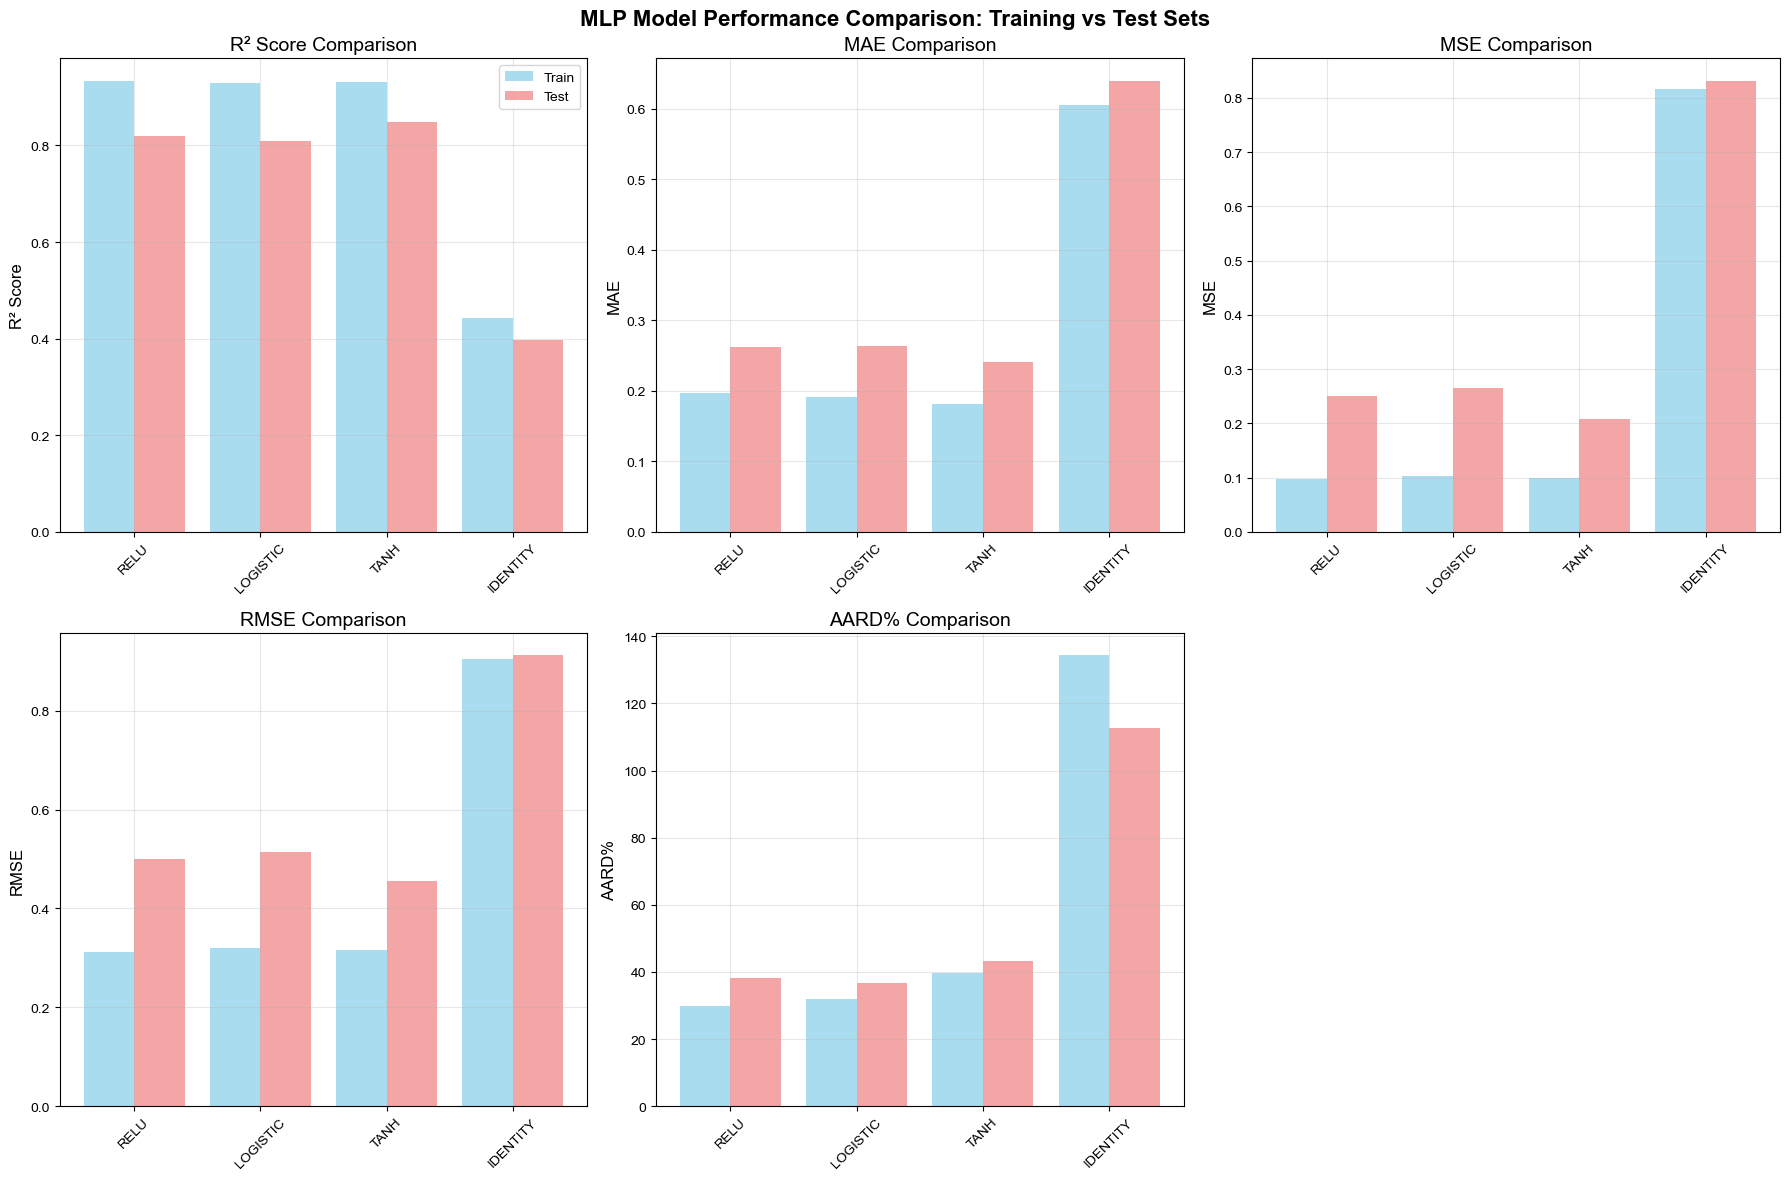

MLPÊ®°ÂûãÊÄßËÉΩÊØîËæÉÂèØËßÜÂåñÂÆåÊàêÔºÅ


In [22]:
# 7. ÂèØËßÜÂåñÊØîËæÉÁªìÊûú
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('MLP Model Performance Comparison: Training vs Test Sets', fontsize=16, fontweight='bold')

model_names = list(results.keys())
metrics_info = [
    ('R2', 'R¬≤ Score', 'R¬≤ Score Comparison'),
    ('MAE', 'MAE', 'MAE Comparison'),
    ('MSE', 'MSE', 'MSE Comparison'),
    ('RMSE', 'RMSE', 'RMSE Comparison'),
    ('AARD%', 'AARD%', 'AARD% Comparison')
]

for i, (metric, ylabel, title) in enumerate(metrics_info):
    row = i // 3
    col = i % 3
    
    # ÊâÄÊúâÂ≠êÂõæ‰ΩøÁî®Áõ∏ÂêåÁöÑÈ¢úËâ≤
    axes[row, col].bar([x - 0.2 for x in range(len(results))], train_comparison_df[metric], 
                      width=0.4, alpha=0.7, label='Train' if i == 0 else "", color='skyblue')
    axes[row, col].bar([x + 0.2 for x in range(len(results))], test_comparison_df[metric], 
                      width=0.4, alpha=0.7, label='Test' if i == 0 else "", color='lightcoral')
    
    axes[row, col].set_title(title, fontname='Arial', fontsize=14)
    axes[row, col].set_ylabel(ylabel, fontname='Arial', fontsize=12)
    axes[row, col].set_xticks(range(len(results)))
    axes[row, col].set_xticklabels([act.upper() for act in model_names], rotation=45, fontname='Arial')
    axes[row, col].grid(True, alpha=0.3)
    
    # Âè™Âú®Á¨¨‰∏Ä‰∏™Â≠êÂõæÊòæÁ§∫Âõæ‰æã
    if i == 0:
        axes[row, col].legend(prop={'family': 'Arial'})

# ÈöêËóèÁ¨¨ÂÖ≠‰∏™Â≠êÂõæ
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.savefig('mlp_model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("MLPÊ®°ÂûãÊÄßËÉΩÊØîËæÉÂèØËßÜÂåñÂÆåÊàêÔºÅ")


GENERATING VISUALIZATIONS FOR EACH ACTIVATION FUNCTION

ÁîüÊàê RELU ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


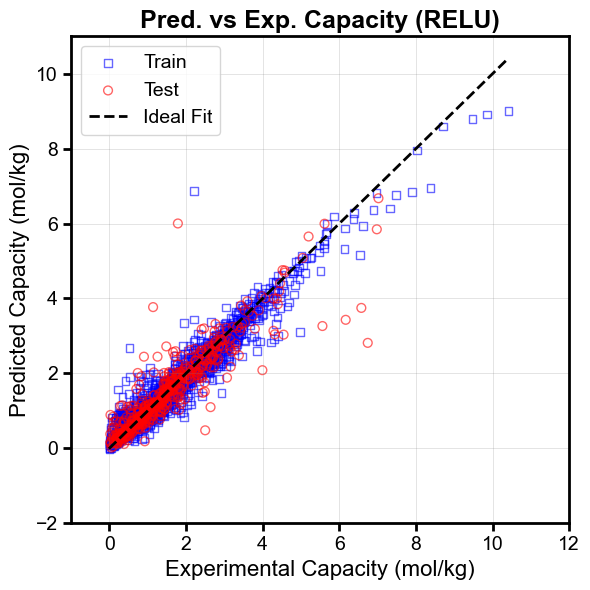

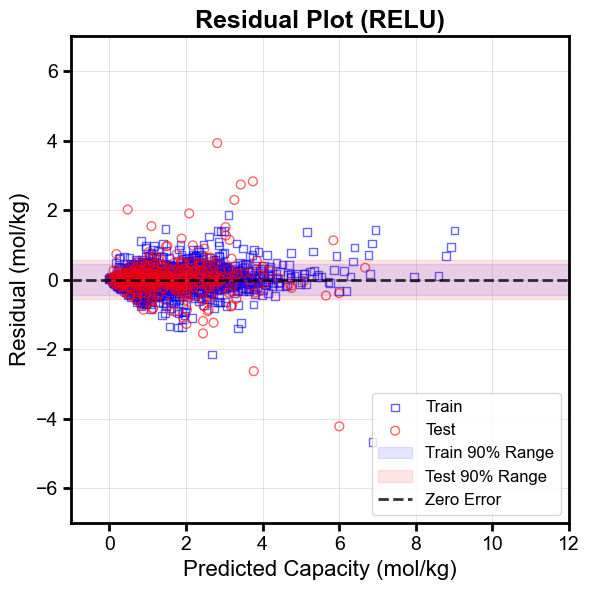

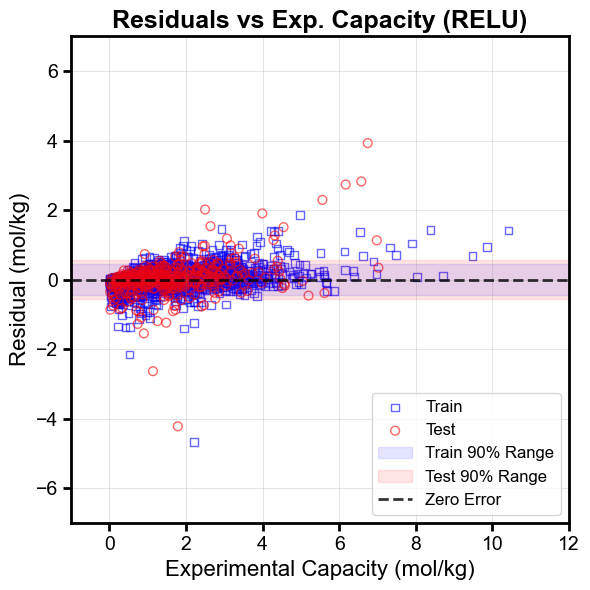

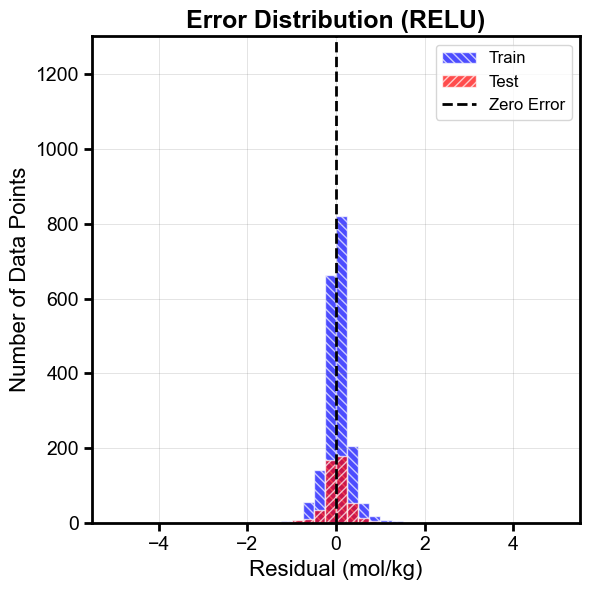

RELU Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 0.023958622242817303, 'mlp__batch_size': 128, 'mlp__hidden_layer_sizes': (65, 60), 'mlp__learning_rate_init': 0.008786070599150143}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9334
ÊµãËØïÈõÜR¬≤: 0.8191
ËÆ≠ÁªÉÈõÜMAE: 0.1967 mol/kg
ÊµãËØïÈõÜMAE: 0.2621 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3122 mol/kg
ÊµãËØïÈõÜRMSE: 0.4995 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.4351, 0.4623] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.5501, 0.5704] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0259 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0344 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.3112 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4989 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1483/2000 Êï∞ÊçÆÁÇπ (74.2%)
ÊµãËØïÈõÜ: 350/500 Êï∞ÊçÆÁÇπ (70.0%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1080 mol/kg

ÁîüÊàê LOGISTIC ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


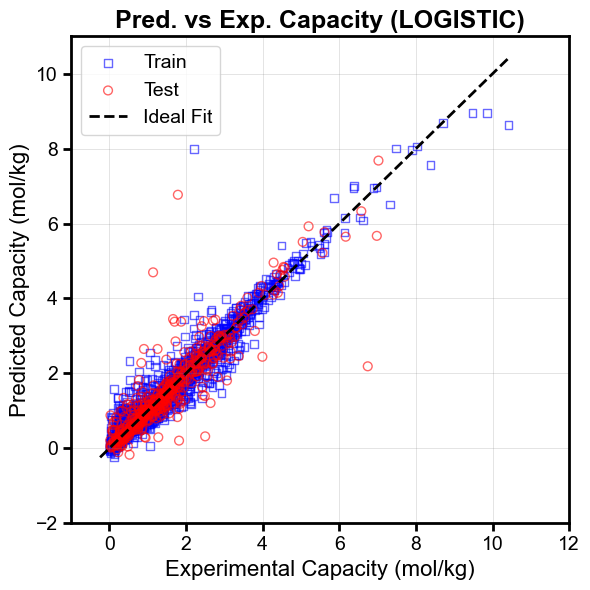

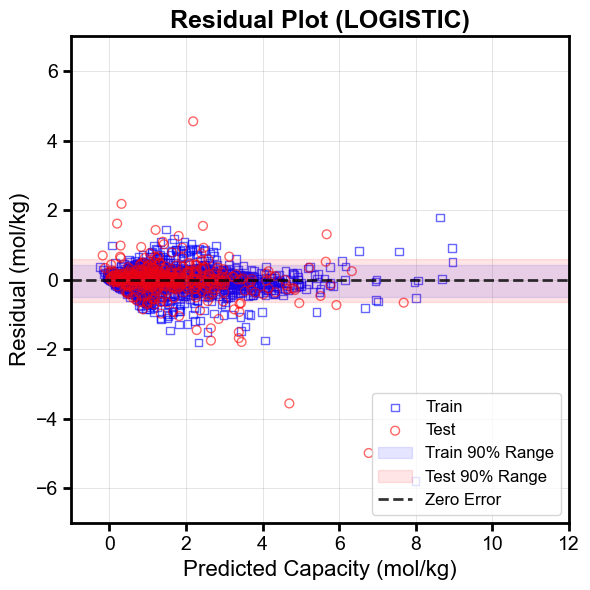

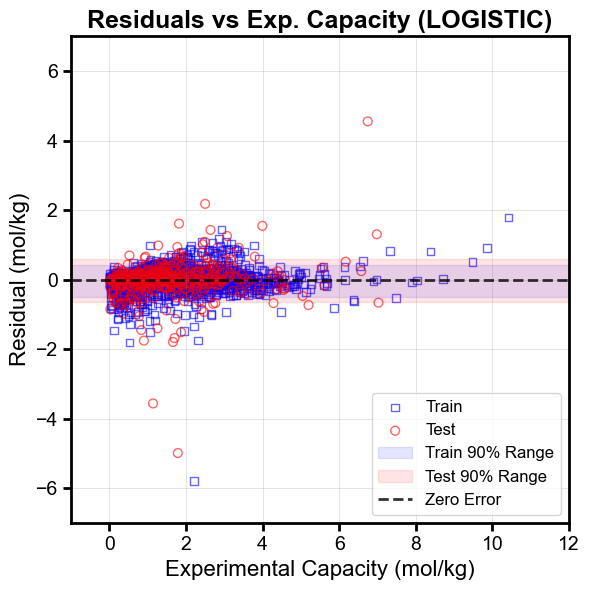

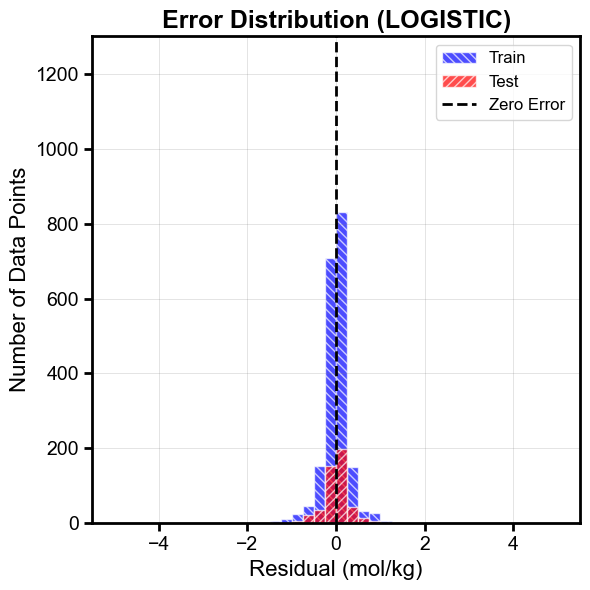

LOGISTIC Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 0.0002185548829509445, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (110, 10), 'mlp__learning_rate_init': 0.0018131243145466684}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9301
ÊµãËØïÈõÜR¬≤: 0.8084
ËÆ≠ÁªÉÈõÜMAE: 0.1909 mol/kg
ÊµãËØïÈõÜMAE: 0.2633 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3198 mol/kg
ÊµãËØïÈõÜRMSE: 0.5140 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.4825, 0.4130] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.6474, 0.5864] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0102 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0011 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.3197 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.5145 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1538/2000 Êï∞ÊçÆÁÇπ (76.9%)
ÊµãËØïÈõÜ: 353/500 Êï∞ÊçÆÁÇπ (70.6%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1649 mol/kg

ÁîüÊàê TANH ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


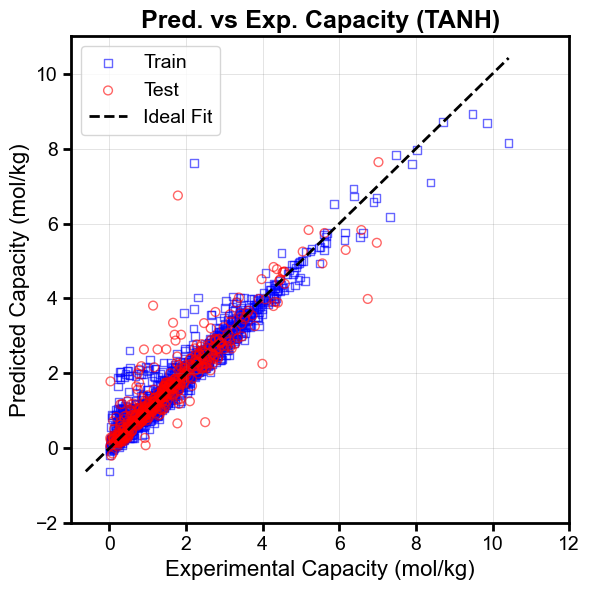

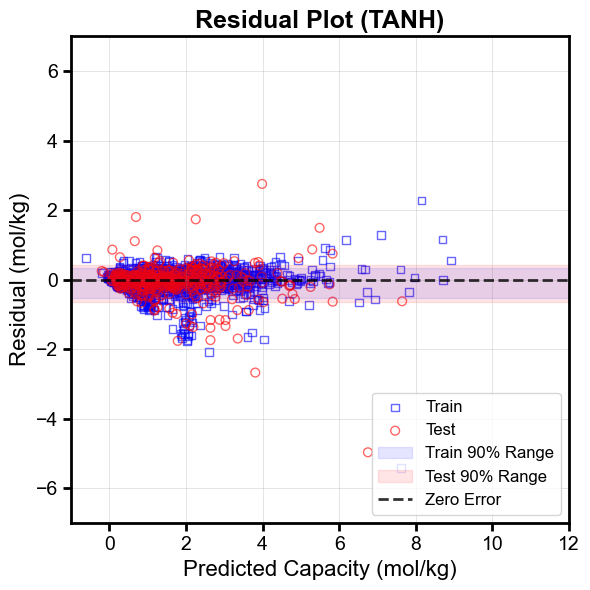

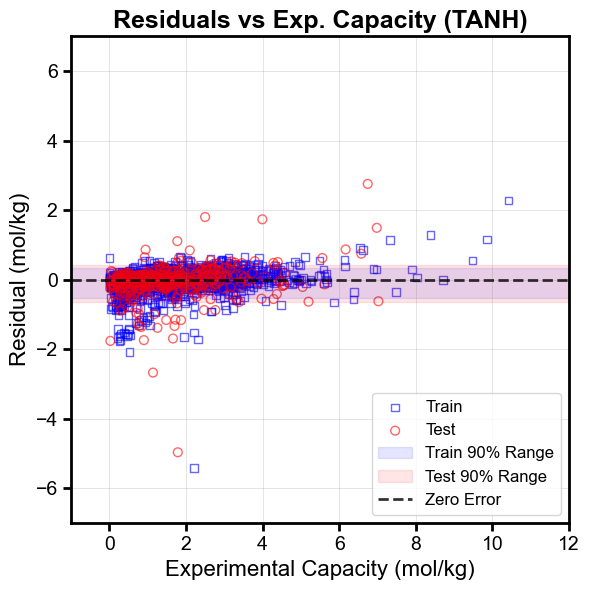

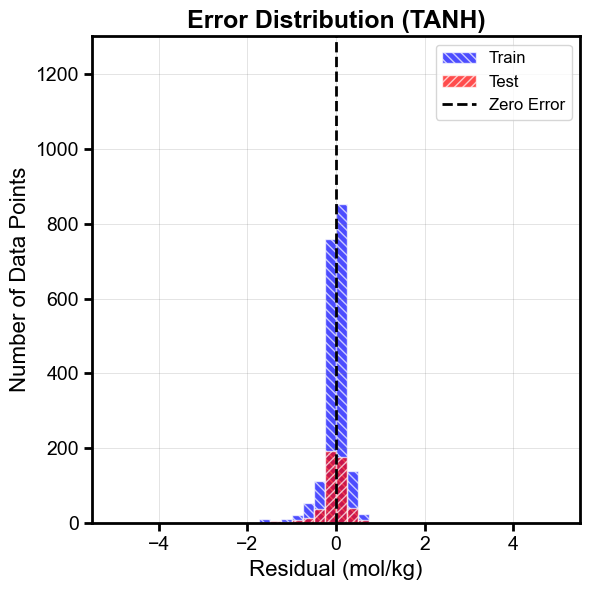

TANH Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 0.0006249958210447859, 'mlp__batch_size': 256, 'mlp__hidden_layer_sizes': (70, 40), 'mlp__learning_rate_init': 0.002899417963369715}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9321
ÊµãËØïÈõÜR¬≤: 0.8495
ËÆ≠ÁªÉÈõÜMAE: 0.1807 mol/kg
ÊµãËØïÈõÜMAE: 0.2403 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3153 mol/kg
ÊµãËØïÈõÜRMSE: 0.4555 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.5228, 0.3300] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.6307, 0.4142] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0304 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0493 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.3139 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4533 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1610/2000 Êï∞ÊçÆÁÇπ (80.5%)
ÊµãËØïÈõÜ: 369/500 Êï∞ÊçÆÁÇπ (73.8%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1080 mol/kg

ÁîüÊàê IDENTITY ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


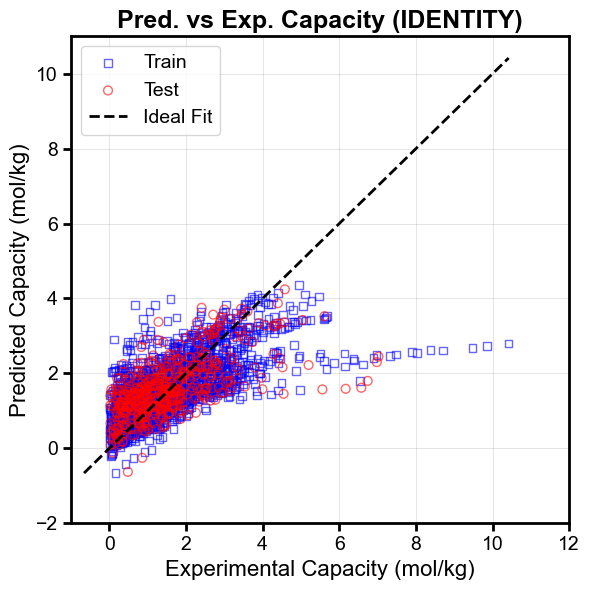

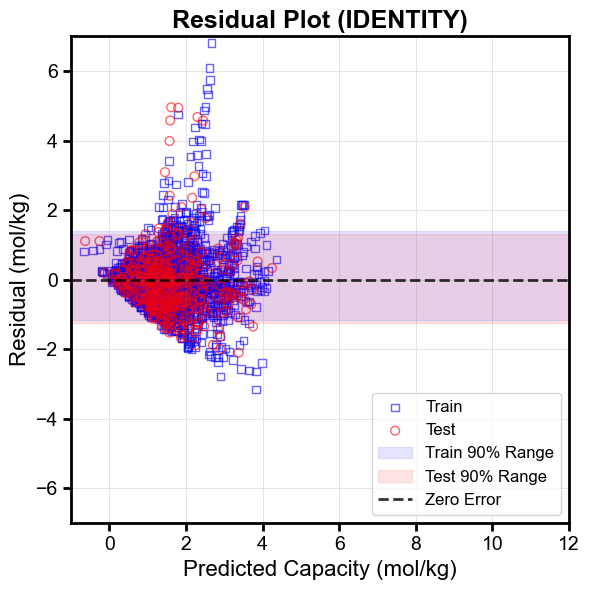

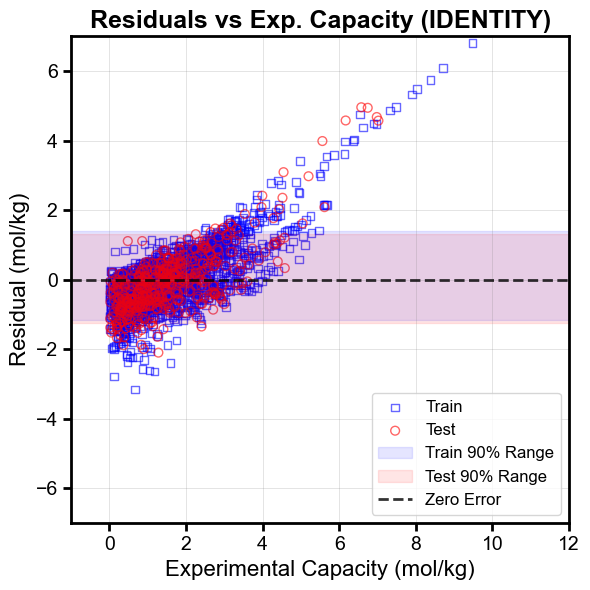

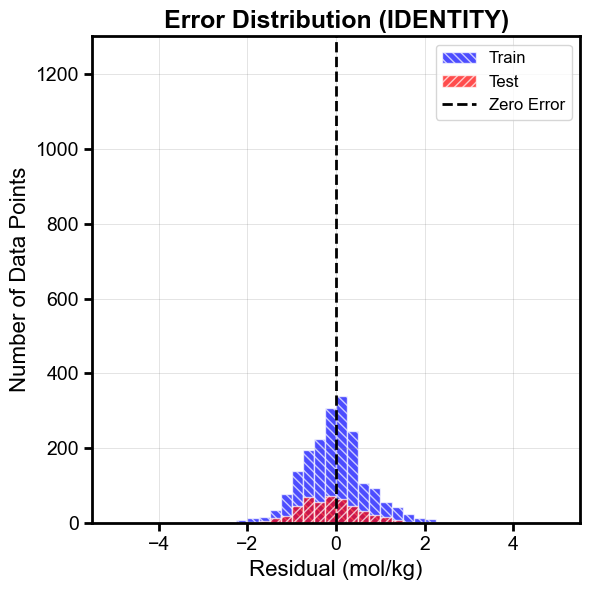

IDENTITY Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 2.6185922438658532e-05, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (105, 60), 'mlp__learning_rate_init': 0.00013974158698336442}
ËÆ≠ÁªÉÈõÜR¬≤: 0.4420
ÊµãËØïÈõÜR¬≤: 0.3974
ËÆ≠ÁªÉÈõÜMAE: 0.6054 mol/kg
ÊµãËØïÈõÜMAE: 0.6393 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.9036 mol/kg
ÊµãËØïÈõÜRMSE: 0.9116 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-1.1487, 1.3982] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-1.2453, 1.3121] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0161 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0475 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9037 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9113 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 648/2000 Êï∞ÊçÆÁÇπ (32.4%)
ÊµãËØïÈõÜ: 139/500 Êï∞ÊçÆÁÇπ (27.8%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.0860 mol/kg

MLPÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ


In [23]:
# 8. ÂÆö‰πâÂèØËßÜÂåñËØÑ‰º∞ÂáΩÊï∞
def calculate_90_percent_range(errors):
    """ËÆ°ÁÆó90%Êï∞ÊçÆÁÇπËêΩÂÖ•ÁöÑÊÆãÂ∑ÆËåÉÂõ¥"""
    lower_bound = np.percentile(errors, 5)
    upper_bound = np.percentile(errors, 95)
    in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
    total = len(errors)
    percentage = (in_range / total) * 100
    return lower_bound, upper_bound, percentage

def plot_mlp_evaluation(activation_name, model_info, X_train, y_train, X_test, y_test, best_params):
    """‰∏∫ÊØè‰∏™ÊøÄÊ¥ªÂáΩÊï∞Ê®°ÂûãÁîüÊàêÂõõÁßçÂèØËßÜÂåñÂõæË°®"""
    
    # Ëé∑ÂèñÈ¢ÑÊµãÂÄº
    y_train_pred = model_info['predictions']['y_train_pred']
    y_test_pred = model_info['predictions']['y_test_pred']
    
    # ËÆ°ÁÆóËØØÂ∑Æ
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    
    # ËÆ°ÁÆó90%ËåÉÂõ¥
    train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
    test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)
    
    # ËÆ°ÁÆóËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖÁöÑÁôæÂàÜÊØî
    def calculate_error_in_range(errors, lower_bound, upper_bound):
        in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
        percentage = (in_range / len(errors)) * 100
        return in_range, percentage
    
    train_in_025, train_percent_025 = calculate_error_in_range(train_errors, -0.25, 0.25)
    test_in_025, test_percent_025 = calculate_error_in_range(test_errors, -0.25, 0.25)
    
    # ËÆæÁΩÆÂÖ®Â±ÄÊ†∑ÂºèÂèÇÊï∞
    border_width = 2.0
    tick_fontsize = 14
    label_fontsize = 16
    title_fontsize = 18
    tick_width = 2.0
    tick_length = 6
    
    # 1. È¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄºÂØπÊØîÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, y_train_pred, color='none', edgecolor='blue', 
               alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
    plt.scatter(y_test, y_test_pred, color='none', edgecolor='red', 
               alpha=0.6, s=40, label="Test", linewidth=1, marker='o')
    
    min_val = min(min(y_train), min(y_test), min(y_train_pred), min(y_test_pred))
    max_val = max(max(y_train), max(y_test), max(y_train_pred), max(y_test_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', 
             linestyle='--', linewidth=2, label='Ideal Fit')
    
    plt.ylim(-2, 11)
    plt.xlim(-1, 12)
    
    plt.xlabel("Experimental Capacity (mol/kg)", fontsize=label_fontsize, fontname='Arial')
    plt.ylabel("Predicted Capacity (mol/kg)", fontsize=label_fontsize, fontname='Arial')
    plt.title(f"Pred. vs Exp. Capacity ({activation_name.upper()})", fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 2. ÊÆãÂ∑Æ vs È¢ÑÊµãÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train_pred, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test_pred, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Predicted Capacity (mol/kg)', fontsize=label_fontsize, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=label_fontsize, fontname='Arial')
    plt.title(f'Residual Plot ({activation_name.upper()})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. ÊÆãÂ∑Æ vs ÂÆûÈ™åÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Experimental Capacity (mol/kg)', fontsize=label_fontsize, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=label_fontsize, fontname='Arial')
    plt.title(f'Residuals vs Exp. Capacity ({activation_name.upper()})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. ËØØÂ∑ÆÂàÜÂ∏ÉÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    # ÊåâÁÖß0.25‰∏∫Èó¥ÈöîÁöÑÂå∫Èó¥ÂàíÂàÜ
    bin_edges = []
    current = 0
    max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))
    
    while current <= max_error + 0.25:
        bin_edges.extend([-current - 0.25, -current])
        if current != 0:
            bin_edges.extend([current, current + 0.25])
        current += 0.25
    
    bin_edges = sorted(set(bin_edges))
    
    plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
             edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
    plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
             edgecolor='white', label='Test', density=False, hatch='////')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
    
    plt.ylim(0, 1300)
    plt.xlim(-5.5, 5.5)
    
    plt.xlabel('Residual (mol/kg)', fontsize=label_fontsize, fontname='Arial')
    plt.ylabel('Number of Data Points', fontsize=label_fontsize, fontname='Arial')
    plt.title(f'Error Distribution ({activation_name.upper()})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper right', prop={'family': 'Arial', 'size': 12})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
    print("="*80)
    print(f"{activation_name.upper()} Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ")
    print("="*80)
    
    train_metrics = model_info['train_metrics']
    test_metrics = model_info['test_metrics']
    
    print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {best_params}")
    print(f"ËÆ≠ÁªÉÈõÜR¬≤: {train_metrics['R2']:.4f}")
    print(f"ÊµãËØïÈõÜR¬≤: {test_metrics['R2']:.4f}")
    print(f"ËÆ≠ÁªÉÈõÜMAE: {train_metrics['MAE']:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜMAE: {test_metrics['MAE']:.4f} mol/kg")
    print(f"ËÆ≠ÁªÉÈõÜRMSE: {train_metrics['RMSE']:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜRMSE: {test_metrics['RMSE']:.4f} mol/kg")
    
    print(f"\nüìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_percentage:.1f}% Âú® [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
    print(f"ÊµãËØïÈõÜ: {test_percentage:.1f}% Âú® [{test_lower:.4f}, {test_upper:.4f}] mol/kg")
    
    print(f"\nüìä ÊÆãÂ∑ÆÁªüËÆ°:")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: {train_errors.mean():.4f} mol/kg")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: {test_errors.mean():.4f} mol/kg")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {train_errors.std():.4f} mol/kg")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {test_errors.std():.4f} mol/kg")
    
    print(f"\nüìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_in_025}/{len(train_errors)} Êï∞ÊçÆÁÇπ ({train_percent_025:.1f}%)")
    print(f"ÊµãËØïÈõÜ: {test_in_025}/{len(test_errors)} Êï∞ÊçÆÁÇπ ({test_percent_025:.1f}%)")
    
    print(f"\nüìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:")
    max_train_error = max(abs(train_lower), abs(train_upper))
    max_test_error = max(abs(test_lower), abs(test_upper))
    
    if max_test_error < 0.1:
        print("‚úÖ ‰ºòÁßÄ: 90%È¢ÑÊµãËØØÂ∑Æ < 0.1 mol/kg")
    elif max_test_error < 0.2:
        print("üëç ËâØÂ•Ω: 90%È¢ÑÊµãËØØÂ∑Æ < 0.2 mol/kg")
    elif max_test_error < 0.3:
        print("‚ö†Ô∏è ‰∏ÄËà¨: 90%È¢ÑÊµãËØØÂ∑Æ < 0.3 mol/kg")
    else:
        print("‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß")
    
    print(f"ËøáÊãüÂêàÁ®ãÂ∫¶: {abs(max_train_error - max_test_error):.4f} mol/kg")

# 9. ‰∏∫ÊØè‰∏™ÊøÄÊ¥ªÂáΩÊï∞ÁîüÊàêÂèØËßÜÂåñÂõæË°®
if results:
    print("\n" + "="*80)
    print("GENERATING VISUALIZATIONS FOR EACH ACTIVATION FUNCTION")
    print("="*80)
    
    for activation_name, model_info in results.items():
        print(f"\n{'='*80}")
        print(f"ÁîüÊàê {activation_name.upper()} ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®")
        print(f"{'='*80}")
        
        plot_mlp_evaluation(
            activation_name=activation_name,
            model_info=model_info,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            best_params=model_info['best_params']
        )

print("\nMLPÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ")


GENERATING VISUALIZATIONS FOR EACH ACTIVATION FUNCTION

ÁîüÊàê RELU ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


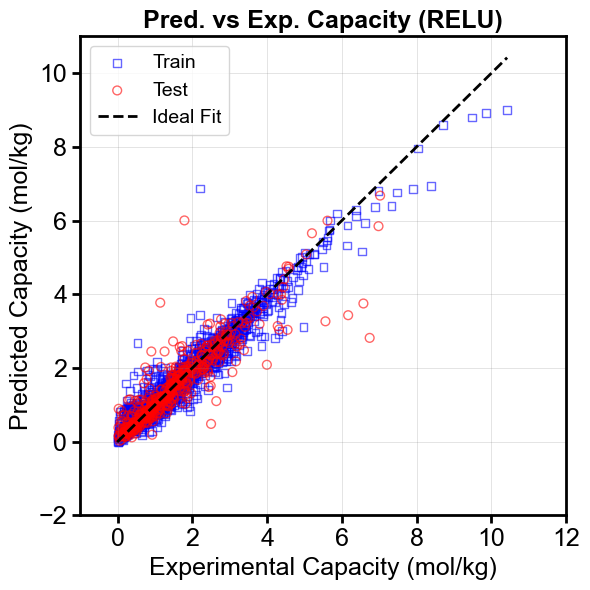

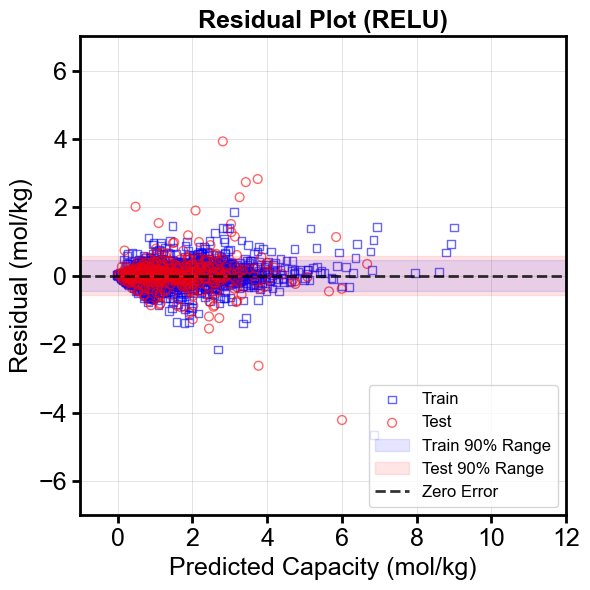

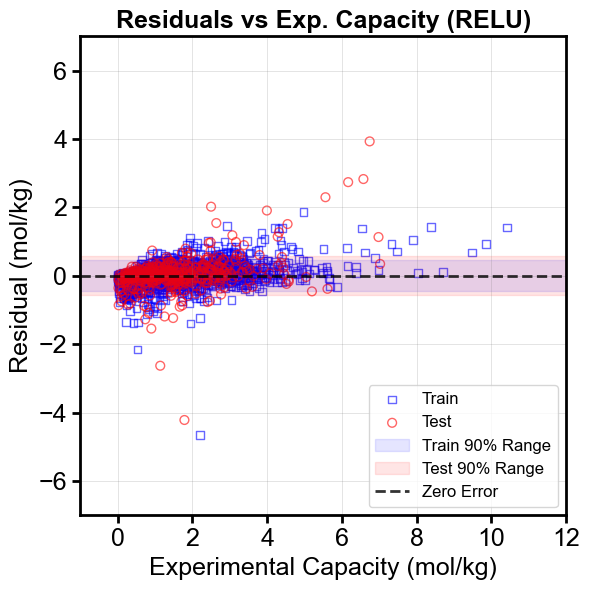

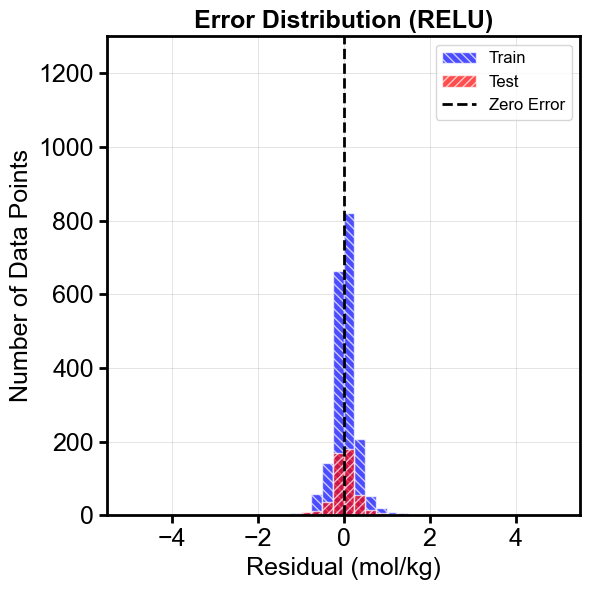

RELU Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 0.023958622242817303, 'mlp__batch_size': 128, 'mlp__hidden_layer_sizes': (65, 60), 'mlp__learning_rate_init': 0.008786070599150143}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9334
ÊµãËØïÈõÜR¬≤: 0.8191
ËÆ≠ÁªÉÈõÜMAE: 0.1967 mol/kg
ÊµãËØïÈõÜMAE: 0.2621 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3122 mol/kg
ÊµãËØïÈõÜRMSE: 0.4995 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.4351, 0.4623] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.5501, 0.5704] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0259 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0344 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.3112 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4989 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1483/2000 Êï∞ÊçÆÁÇπ (74.2%)
ÊµãËØïÈõÜ: 350/500 Êï∞ÊçÆÁÇπ (70.0%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1080 mol/kg

ÁîüÊàê LOGISTIC ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


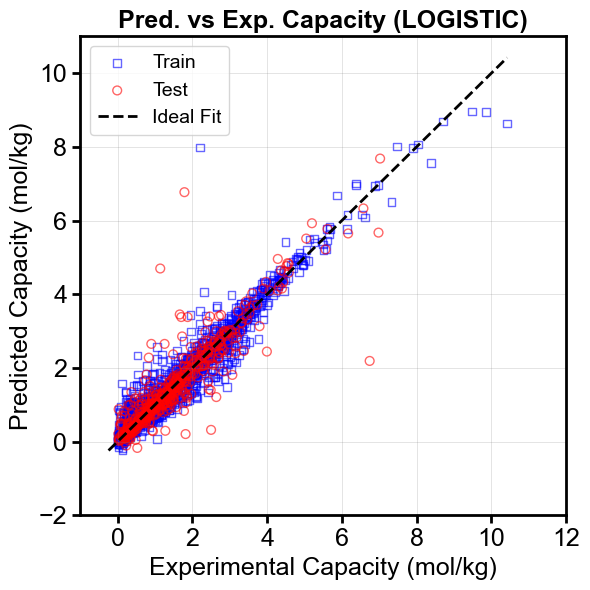

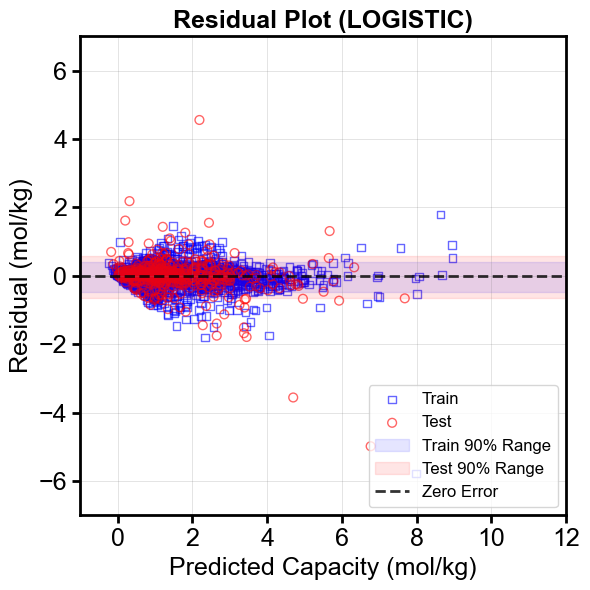

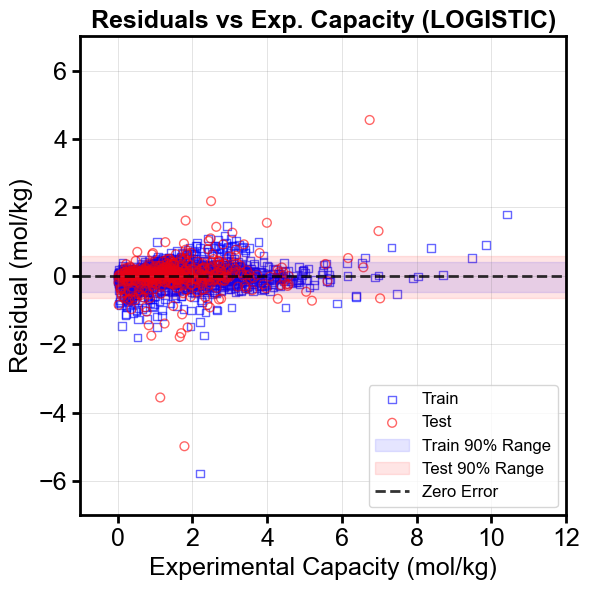

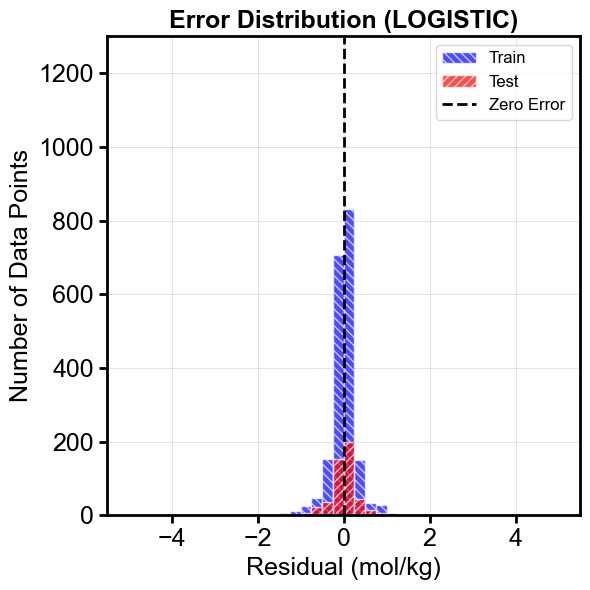

LOGISTIC Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 0.0002185548829509445, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (110, 10), 'mlp__learning_rate_init': 0.0018131243145466684}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9301
ÊµãËØïÈõÜR¬≤: 0.8084
ËÆ≠ÁªÉÈõÜMAE: 0.1909 mol/kg
ÊµãËØïÈõÜMAE: 0.2633 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3198 mol/kg
ÊµãËØïÈõÜRMSE: 0.5140 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.4825, 0.4130] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.6474, 0.5864] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0102 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0011 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.3197 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.5145 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1538/2000 Êï∞ÊçÆÁÇπ (76.9%)
ÊµãËØïÈõÜ: 353/500 Êï∞ÊçÆÁÇπ (70.6%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1649 mol/kg

ÁîüÊàê TANH ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


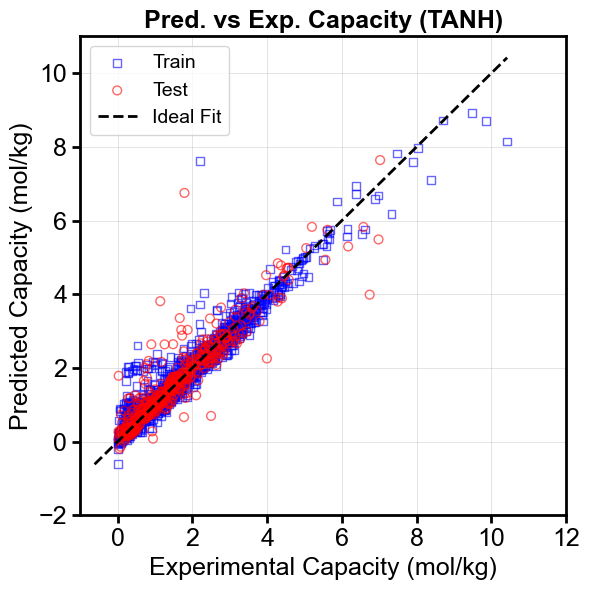

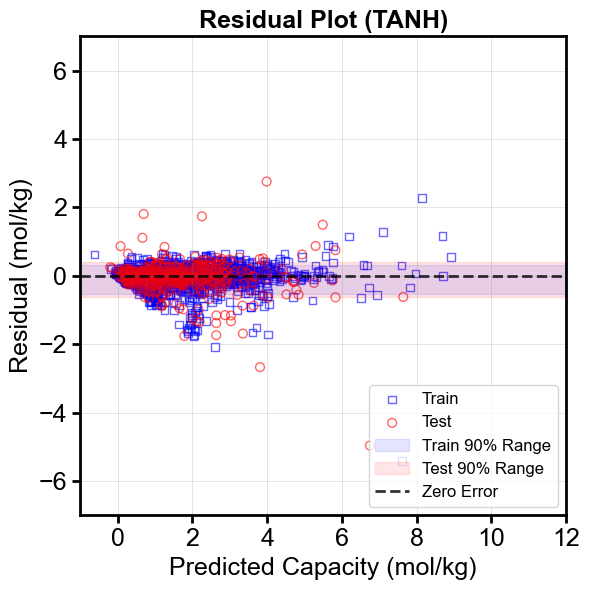

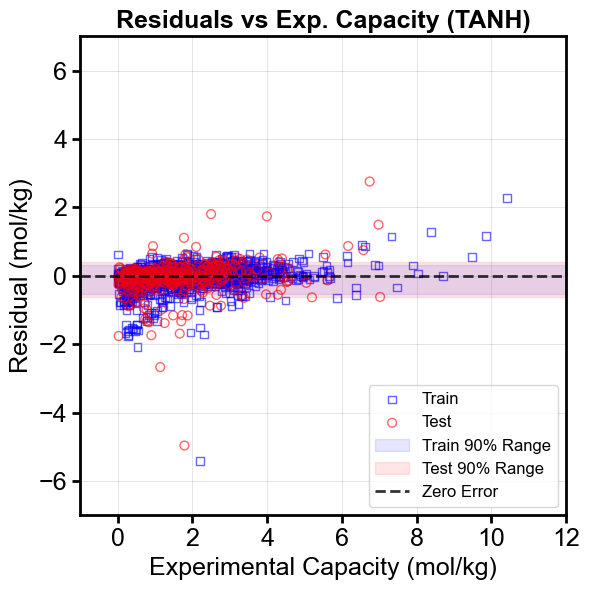

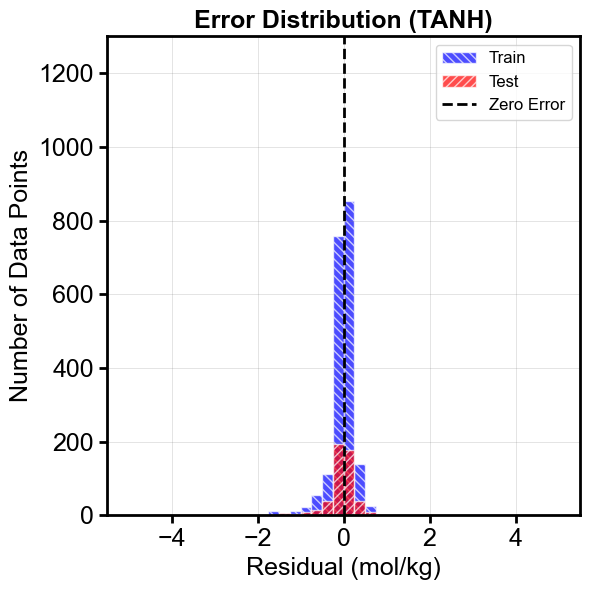

TANH Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 0.0006249958210447859, 'mlp__batch_size': 256, 'mlp__hidden_layer_sizes': (70, 40), 'mlp__learning_rate_init': 0.002899417963369715}
ËÆ≠ÁªÉÈõÜR¬≤: 0.9321
ÊµãËØïÈõÜR¬≤: 0.8495
ËÆ≠ÁªÉÈõÜMAE: 0.1807 mol/kg
ÊµãËØïÈõÜMAE: 0.2403 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.3153 mol/kg
ÊµãËØïÈõÜRMSE: 0.4555 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-0.5228, 0.3300] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-0.6307, 0.4142] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0304 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0493 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.3139 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.4533 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 1610/2000 Êï∞ÊçÆÁÇπ (80.5%)
ÊµãËØïÈõÜ: 369/500 Êï∞ÊçÆÁÇπ (73.8%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.1080 mol/kg

ÁîüÊàê IDENTITY ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®


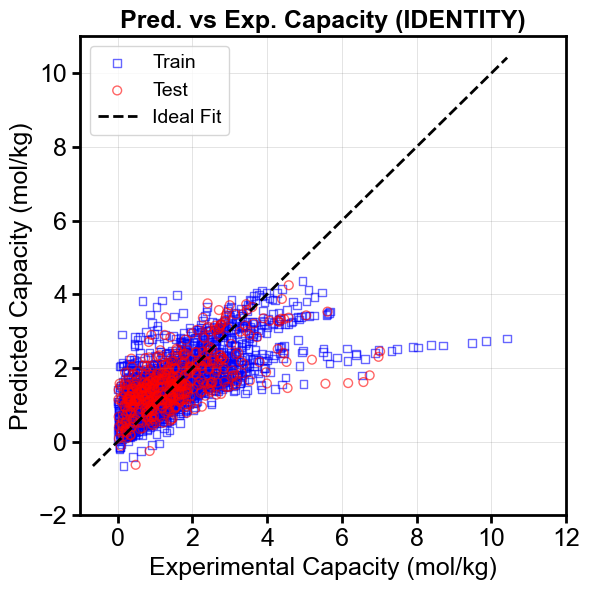

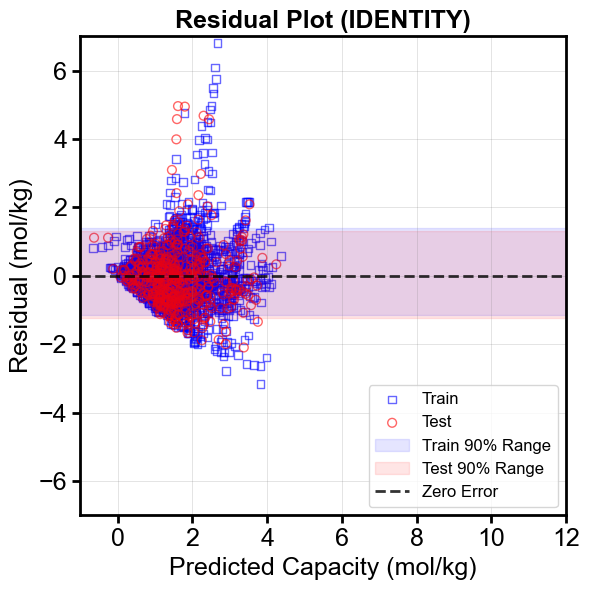

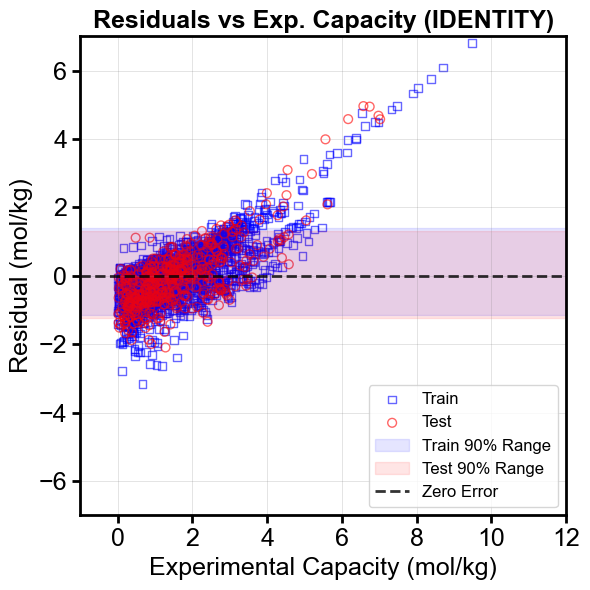

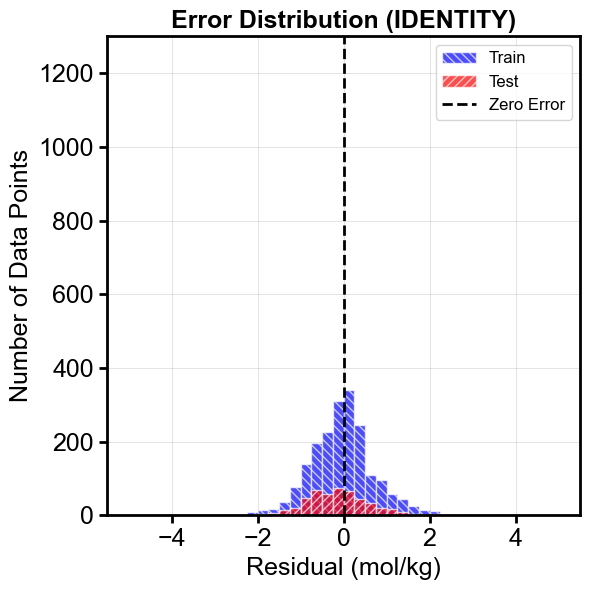

IDENTITY Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ
ÊúÄ‰Ω≥ÂèÇÊï∞: {'mlp__alpha': 2.6185922438658532e-05, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (105, 60), 'mlp__learning_rate_init': 0.00013974158698336442}
ËÆ≠ÁªÉÈõÜR¬≤: 0.4420
ÊµãËØïÈõÜR¬≤: 0.3974
ËÆ≠ÁªÉÈõÜMAE: 0.6054 mol/kg
ÊµãËØïÈõÜMAE: 0.6393 mol/kg
ËÆ≠ÁªÉÈõÜRMSE: 0.9036 mol/kg
ÊµãËØïÈõÜRMSE: 0.9116 mol/kg

üìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:
ËÆ≠ÁªÉÈõÜ: 90.0% Âú® [-1.1487, 1.3982] mol/kg
ÊµãËØïÈõÜ: 90.0% Âú® [-1.2453, 1.3121] mol/kg

üìä ÊÆãÂ∑ÆÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: 0.0161 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: -0.0475 mol/kg
ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9037 mol/kg
ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: 0.9113 mol/kg

üìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:
ËÆ≠ÁªÉÈõÜ: 648/2000 Êï∞ÊçÆÁÇπ (32.4%)
ÊµãËØïÈõÜ: 139/500 Êï∞ÊçÆÁÇπ (27.8%)

üìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:
‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß
ËøáÊãüÂêàÁ®ãÂ∫¶: 0.0860 mol/kg

MLPÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ


In [24]:
# 8. ÂÆö‰πâÂèØËßÜÂåñËØÑ‰º∞ÂáΩÊï∞
def calculate_90_percent_range(errors):
    """ËÆ°ÁÆó90%Êï∞ÊçÆÁÇπËêΩÂÖ•ÁöÑÊÆãÂ∑ÆËåÉÂõ¥"""
    lower_bound = np.percentile(errors, 5)
    upper_bound = np.percentile(errors, 95)
    in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
    total = len(errors)
    percentage = (in_range / total) * 100
    return lower_bound, upper_bound, percentage

def plot_mlp_evaluation(activation_name, model_info, X_train, y_train, X_test, y_test, best_params):
    """‰∏∫ÊØè‰∏™ÊøÄÊ¥ªÂáΩÊï∞Ê®°ÂûãÁîüÊàêÂõõÁßçÂèØËßÜÂåñÂõæË°®"""
    
    # Ëé∑ÂèñÈ¢ÑÊµãÂÄº
    y_train_pred = model_info['predictions']['y_train_pred']
    y_test_pred = model_info['predictions']['y_test_pred']
    
    # ËÆ°ÁÆóËØØÂ∑Æ
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    
    # ËÆ°ÁÆó90%ËåÉÂõ¥
    train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
    test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)
    
    # ËÆ°ÁÆóËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖÁöÑÁôæÂàÜÊØî
    def calculate_error_in_range(errors, lower_bound, upper_bound):
        in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
        percentage = (in_range / len(errors)) * 100
        return in_range, percentage
    
    train_in_025, train_percent_025 = calculate_error_in_range(train_errors, -0.25, 0.25)
    test_in_025, test_percent_025 = calculate_error_in_range(test_errors, -0.25, 0.25)
    
    # ËÆæÁΩÆÂÖ®Â±ÄÊ†∑ÂºèÂèÇÊï∞
    border_width = 2.0
    tick_fontsize = 14
    label_fontsize = 16
    title_fontsize = 18
    tick_width = 2.0
    tick_length = 6
    
    # 1. È¢ÑÊµãÂÄº‰∏éÁúüÂÆûÂÄºÂØπÊØîÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, y_train_pred, color='none', edgecolor='blue', 
               alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
    plt.scatter(y_test, y_test_pred, color='none', edgecolor='red', 
               alpha=0.6, s=40, label="Test", linewidth=1, marker='o')
    
    min_val = min(min(y_train), min(y_test), min(y_train_pred), min(y_test_pred))
    max_val = max(max(y_train), max(y_test), max(y_train_pred), max(y_test_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', 
             linestyle='--', linewidth=2, label='Ideal Fit')
    
    plt.ylim(-2, 11)
    plt.xlim(-1, 12)
    
    plt.xlabel("Experimental Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.ylabel("Predicted Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.title(f"Pred. vs Exp. Capacity ({activation_name.upper()})", fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 2. ÊÆãÂ∑Æ vs È¢ÑÊµãÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train_pred, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test_pred, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Predicted Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residual Plot ({activation_name.upper()})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. ÊÆãÂ∑Æ vs ÂÆûÈ™åÂÄºÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Experimental Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residuals vs Exp. Capacity ({activation_name.upper()})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. ËØØÂ∑ÆÂàÜÂ∏ÉÂõæ
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    # ÊåâÁÖß0.25‰∏∫Èó¥ÈöîÁöÑÂå∫Èó¥ÂàíÂàÜ
    bin_edges = []
    current = 0
    max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))
    
    while current <= max_error + 0.25:
        bin_edges.extend([-current - 0.25, -current])
        if current != 0:
            bin_edges.extend([current, current + 0.25])
        current += 0.25
    
    bin_edges = sorted(set(bin_edges))
    
    plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
             edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
    plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
             edgecolor='white', label='Test', density=False, hatch='////')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
    
    plt.ylim(0, 1300)
    plt.xlim(-5.5, 5.5)
    
    plt.xlabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Number of Data Points', fontsize=18, fontname='Arial')
    plt.title(f'Error Distribution ({activation_name.upper()})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper right', prop={'family': 'Arial', 'size': 12})
    
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ËØ¶ÁªÜÁöÑÁªüËÆ°‰ø°ÊÅØ
    print("="*80)
    print(f"{activation_name.upper()} Ê®°ÂûãËØ¶ÁªÜÁªüËÆ°‰ø°ÊÅØ")
    print("="*80)
    
    train_metrics = model_info['train_metrics']
    test_metrics = model_info['test_metrics']
    
    print(f"ÊúÄ‰Ω≥ÂèÇÊï∞: {best_params}")
    print(f"ËÆ≠ÁªÉÈõÜR¬≤: {train_metrics['R2']:.4f}")
    print(f"ÊµãËØïÈõÜR¬≤: {test_metrics['R2']:.4f}")
    print(f"ËÆ≠ÁªÉÈõÜMAE: {train_metrics['MAE']:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜMAE: {test_metrics['MAE']:.4f} mol/kg")
    print(f"ËÆ≠ÁªÉÈõÜRMSE: {train_metrics['RMSE']:.4f} mol/kg")
    print(f"ÊµãËØïÈõÜRMSE: {test_metrics['RMSE']:.4f} mol/kg")
    
    print(f"\nüìä ÊÆãÂ∑ÆÂàÜÊûê - 90%Êï∞ÊçÆÁÇπËåÉÂõ¥:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_percentage:.1f}% Âú® [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
    print(f"ÊµãËØïÈõÜ: {test_percentage:.1f}% Âú® [{test_lower:.4f}, {test_upper:.4f}] mol/kg")
    
    print(f"\nüìä ÊÆãÂ∑ÆÁªüËÆ°:")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÂùáÂÄº: {train_errors.mean():.4f} mol/kg")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÂùáÂÄº: {test_errors.mean():.4f} mol/kg")
    print(f"ËÆ≠ÁªÉÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {train_errors.std():.4f} mol/kg")
    print(f"ÊµãËØïÈõÜÊÆãÂ∑ÆÊ†áÂáÜÂ∑Æ: {test_errors.std():.4f} mol/kg")
    
    print(f"\nüìä ËØØÂ∑ÆÂú®[-0.25, 0.25]ËåÉÂõ¥ÂÜÖ:")
    print(f"ËÆ≠ÁªÉÈõÜ: {train_in_025}/{len(train_errors)} Êï∞ÊçÆÁÇπ ({train_percent_025:.1f}%)")
    print(f"ÊµãËØïÈõÜ: {test_in_025}/{len(test_errors)} Êï∞ÊçÆÁÇπ ({test_percent_025:.1f}%)")
    
    print(f"\nüìä Ê®°ÂûãÊÄßËÉΩËØÑ‰º∞:")
    max_train_error = max(abs(train_lower), abs(train_upper))
    max_test_error = max(abs(test_lower), abs(test_upper))
    
    if max_test_error < 0.1:
        print("‚úÖ ‰ºòÁßÄ: 90%È¢ÑÊµãËØØÂ∑Æ < 0.1 mol/kg")
    elif max_test_error < 0.2:
        print("üëç ËâØÂ•Ω: 90%È¢ÑÊµãËØØÂ∑Æ < 0.2 mol/kg")
    elif max_test_error < 0.3:
        print("‚ö†Ô∏è ‰∏ÄËà¨: 90%È¢ÑÊµãËØØÂ∑Æ < 0.3 mol/kg")
    else:
        print("‚ùå ÈúÄË¶ÅÊîπËøõ: È¢ÑÊµãËØØÂ∑ÆËæÉÂ§ß")
    
    print(f"ËøáÊãüÂêàÁ®ãÂ∫¶: {abs(max_train_error - max_test_error):.4f} mol/kg")

# 9. ‰∏∫ÊØè‰∏™ÊøÄÊ¥ªÂáΩÊï∞ÁîüÊàêÂèØËßÜÂåñÂõæË°®
if results:
    print("\n" + "="*80)
    print("GENERATING VISUALIZATIONS FOR EACH ACTIVATION FUNCTION")
    print("="*80)
    
    for activation_name, model_info in results.items():
        print(f"\n{'='*80}")
        print(f"ÁîüÊàê {activation_name.upper()} ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂèØËßÜÂåñÂõæË°®")
        print(f"{'='*80}")
        
        plot_mlp_evaluation(
            activation_name=activation_name,
            model_info=model_info,
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            best_params=model_info['best_params']
        )

print("\nMLPÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ")


PREDICTION RESULTS FOR ALL MODELS

RELU È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.1967
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.2621

LOGISTIC È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.1909
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.2633

TANH È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.1807
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.2403

IDENTITY È¢ÑÊµãÁªìÊûúÁªüËÆ°:
ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: 2000
ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: 500
ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.6054
ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: 0.6393

Ââç20Ë°åÈ¢ÑÊµãÁªìÊûú:
   Activation Dataset  True_y  Predicted_y  Absolute_Error  Relative_Error
0        relu   Train  9.8530       8.9160          0.9370          9.5094
1        relu   Train  1.9806       2.5265          0.5459         27.5615
2        relu   Train  1.5088       1.4621          0.0467          3.0949
3        relu   Train  0.2609       0.3708    

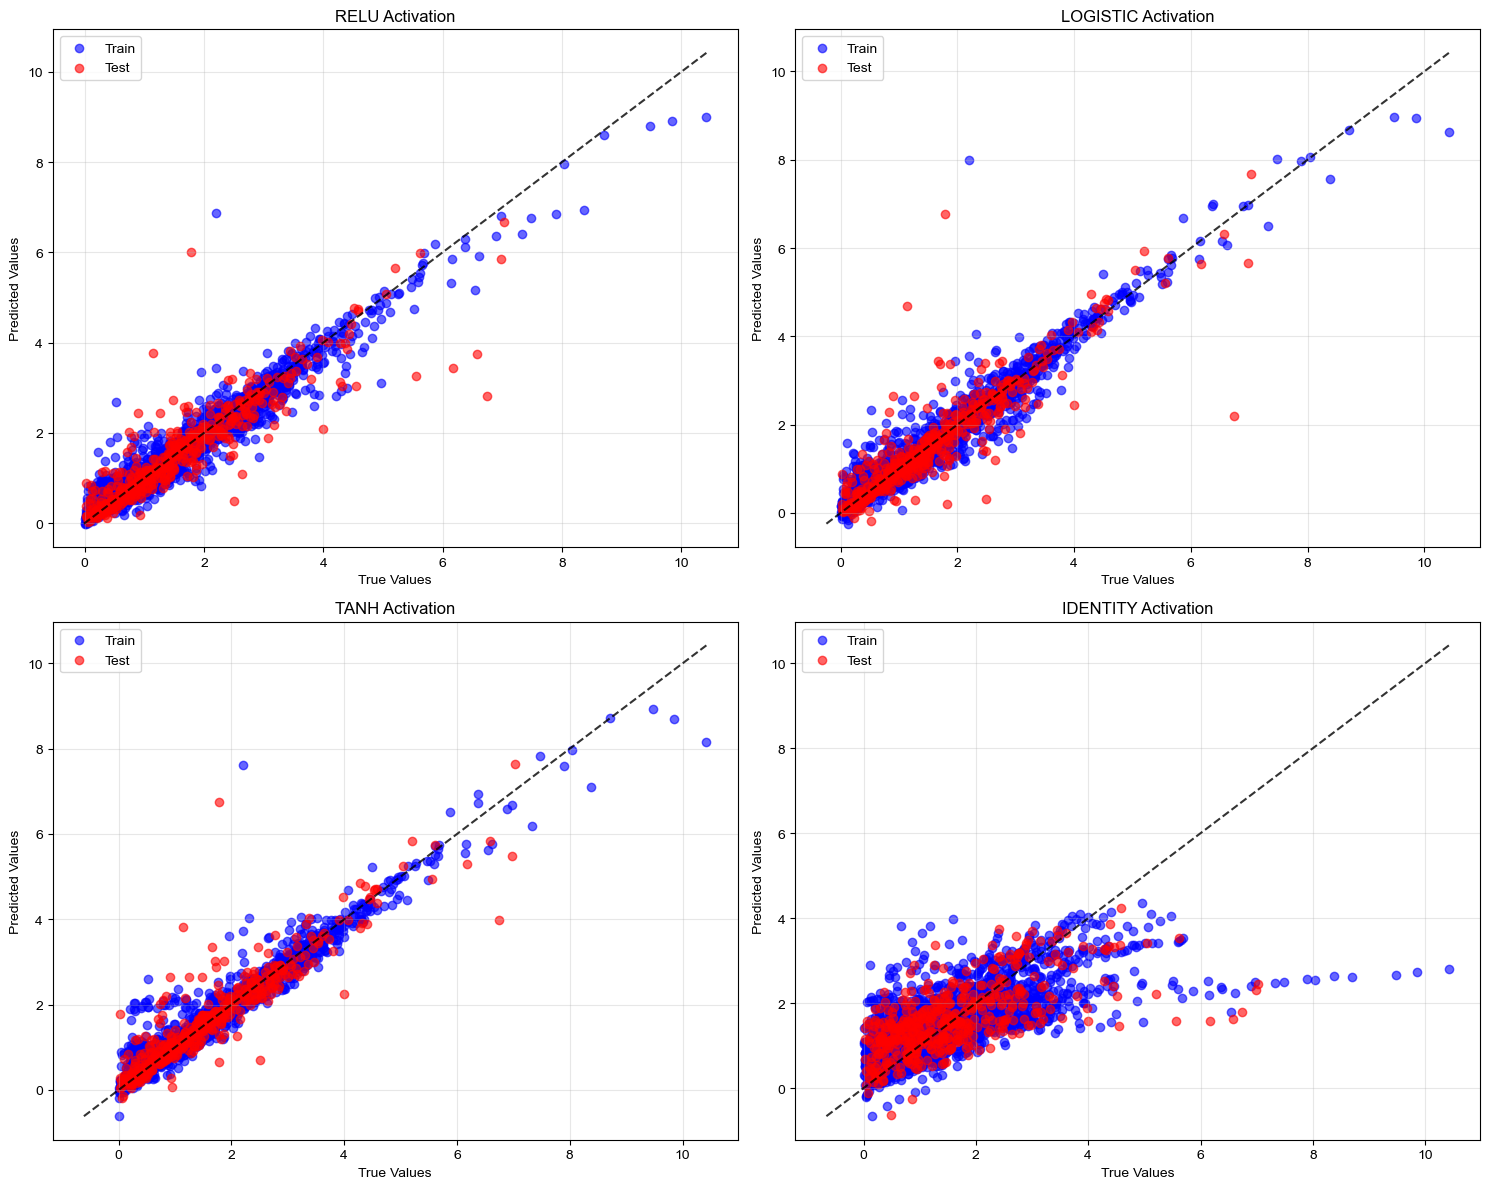


ÊúÄ‰Ω≥Ê®°Âûã: TANH ÊøÄÊ¥ªÂáΩÊï∞
ÊµãËØïÈõÜR2: 0.8495
ÊµãËØïÈõÜRMSE: 0.4555
ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫ 'E:\RNZhang\CO2 capacity\‰øÆÊîπ\MLP‰øÆÊîπ_four activation_no early stopping - ÂâØÊú¨\best_model_tanh.pkl'


In [30]:
# 6. ËæìÂá∫ÊâÄÊúâÊ®°ÂûãÁöÑÈ¢ÑÊµãÁªìÊûú
print("\n" + "="*80)
print("PREDICTION RESULTS FOR ALL MODELS")
print("="*80)

# ÂàõÂª∫DataFrameÊù•Â≠òÂÇ®ÊâÄÊúâÈ¢ÑÊµãÁªìÊûú
all_predictions = []

for activation_name, res in results.items():
    # Ëé∑ÂèñËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÈ¢ÑÊµãÁªìÊûú
    y_train_pred = res['predictions']['y_train_pred']
    y_test_pred = res['predictions']['y_test_pred']
    
    # ÂàõÂª∫ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    train_df = pd.DataFrame({
        'Activation': activation_name,
        'Dataset': 'Train',
        'True_y': y_train,
        'Predicted_y': y_train_pred,
        'Absolute_Error': np.abs(y_train - y_train_pred),
        'Relative_Error': np.abs((y_train - y_train_pred) / np.clip(np.abs(y_train), 1e-10, None)) * 100
    })
    
    # ÂàõÂª∫ÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    test_df = pd.DataFrame({
        'Activation': activation_name,
        'Dataset': 'Test',
        'True_y': y_test,
        'Predicted_y': y_test_pred,
        'Absolute_Error': np.abs(y_test - y_test_pred),
        'Relative_Error': np.abs((y_test - y_test_pred) / np.clip(np.abs(y_test), 1e-10, None)) * 100
    })
    
    # ÂêàÂπ∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁªìÊûú
    activation_df = pd.concat([train_df, test_df], ignore_index=True)
    all_predictions.append(activation_df)
    
    # ËæìÂá∫ÊØè‰∏™ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûúÁªüËÆ°
    print(f"\n{activation_name.upper()} È¢ÑÊµãÁªìÊûúÁªüËÆ°:")
    print(f"ËÆ≠ÁªÉÈõÜÊ†∑Êú¨Êï∞: {len(y_train)}")
    print(f"ÊµãËØïÈõÜÊ†∑Êú¨Êï∞: {len(y_test)}")
    print(f"ËÆ≠ÁªÉÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: {np.mean(np.abs(y_train - y_train_pred)):.4f}")
    print(f"ÊµãËØïÈõÜÂπ≥ÂùáÁªùÂØπËØØÂ∑Æ: {np.mean(np.abs(y_test - y_test_pred)):.4f}")

# ÂêàÂπ∂ÊâÄÊúâÊøÄÊ¥ªÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûú
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# ËæìÂá∫Ââç20Ë°åÈ¢ÑÊµãÁªìÊûú
print("\nÂâç20Ë°åÈ¢ÑÊµãÁªìÊûú:")
print(all_predictions_df.head(20).round(4))

# ÊåâÊøÄÊ¥ªÂáΩÊï∞ÂíåÊï∞ÊçÆÈõÜÂàÜÁªÑÁªüËÆ°
print("\nÊåâÊøÄÊ¥ªÂáΩÊï∞ÂíåÊï∞ÊçÆÈõÜÂàÜÁªÑÁöÑÈ¢ÑÊµãËØØÂ∑ÆÁªüËÆ°:")
grouped_stats = all_predictions_df.groupby(['Activation', 'Dataset']).agg({
    'Absolute_Error': ['mean', 'std', 'min', 'max'],
    'Relative_Error': ['mean', 'std', 'min', 'max']
}).round(4)
print(grouped_stats)

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞CSVÊñá‰ª∂
import os
import joblib

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞CSVÊñá‰ª∂Ôºà‰øùÂ≠òÂà∞.ipynbÊâÄÂú®ÁõÆÂΩïÔºâ
csv_filename = 'all_model_predictions.csv'
all_predictions_df.to_csv(csv_filename, index=False)

# Ëé∑ÂèñÂÆåÊï¥ÁöÑÁªùÂØπË∑ØÂæÑÂπ∂ÊòæÁ§∫
csv_absolute_path = os.path.abspath(csv_filename)
print(f"\nÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ '{csv_absolute_path}'")


# 7. ÂèØÈÄâÔºöÂèØËßÜÂåñÈ¢ÑÊµãÁªìÊûú
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, activation_name in enumerate(activations):
    if activation_name in results:
        # Ëé∑ÂèñËØ•ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûú
        activation_data = all_predictions_df[all_predictions_df['Activation'] == activation_name]
        
        # ÂàÜÁ¶ªËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
        train_data = activation_data[activation_data['Dataset'] == 'Train']
        test_data = activation_data[activation_data['Dataset'] == 'Test']
        
        # ÁªòÂà∂Êï£ÁÇπÂõæ
        axes[i].scatter(train_data['True_y'], train_data['Predicted_y'], 
                       alpha=0.6, label='Train', c='blue')
        axes[i].scatter(test_data['True_y'], test_data['Predicted_y'], 
                       alpha=0.6, label='Test', c='red')
        
        # Ê∑ªÂä†ÁêÜÊÉ≥È¢ÑÊµãÁ∫ø
        min_val = min(activation_data['True_y'].min(), activation_data['Predicted_y'].min())
        max_val = max(activation_data['True_y'].max(), activation_data['Predicted_y'].max())
        axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
        
        axes[i].set_xlabel('True Values')
        axes[i].set_ylabel('Predicted Values')
        axes[i].set_title(f'{activation_name.upper()} Activation')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('prediction_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. ËæìÂá∫ÊúÄ‰Ω≥Ê®°ÂûãÔºàÂü∫‰∫éÊµãËØïÈõÜR2Ôºâ
best_activation = max(results.items(), key=lambda x: x[1]['test_metrics']['R2'])[0]
print(f"\nÊúÄ‰Ω≥Ê®°Âûã: {best_activation.upper()} ÊøÄÊ¥ªÂáΩÊï∞")
print(f"ÊµãËØïÈõÜR2: {results[best_activation]['test_metrics']['R2']:.4f}")
print(f"ÊµãËØïÈõÜRMSE: {results[best_activation]['test_metrics']['RMSE']:.4f}")

# ‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÔºà‰øùÂ≠òÂà∞.ipynbÊâÄÂú®ÁõÆÂΩïÔºâ
best_model_filename = f'best_model_{best_activation}.pkl'
joblib.dump(results[best_activation]['best_model'], best_model_filename)

# Ëé∑ÂèñÂÆåÊï¥ÁöÑÁªùÂØπË∑ØÂæÑÂπ∂ÊòæÁ§∫
model_absolute_path = os.path.abspath(best_model_filename)
print(f"ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò‰∏∫ '{model_absolute_path}'")

In [33]:
# Ëé∑ÂèñËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÂéüÂßãÁ¥¢Âºï
train_indices = X_train.index  # ËÆ≠ÁªÉÈõÜÁöÑÂéüÂßãÁ¥¢Âºï
test_indices = X_test.index    # ÊµãËØïÈõÜÁöÑÂéüÂßãÁ¥¢Âºï

# ‰ªéÂéüÂßãÊï∞ÊçÆ‰∏≠Ëé∑ÂèñÂØπÂ∫îÁöÑNo.ÂíåIL
train_no = data.loc[train_indices, 'No.'].values
train_il = data.loc[train_indices, 'IL'].values
test_no = data.loc[test_indices, 'No.'].values
test_il = data.loc[test_indices, 'IL'].values

all_predictions = []

for kernel_name, res in results.items():
    print(f"‰∏∫ {kernel_name} ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...")
    best_model = res['best_model']
    
    # ËÆ°ÁÆóËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁöÑÈ¢ÑÊµã
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # ÂàõÂª∫ËÆ≠ÁªÉÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    train_df = pd.DataFrame({
        'No.': train_no,
        'IL': train_il,
        'Kernel': kernel_name,
        'Dataset': 'Train',
        'True_y': y_train.values,
        'Predicted_y': y_train_pred,
        'Absolute_Error': np.abs(y_train.values - y_train_pred),
        'Relative_Error_%': np.abs((y_train.values - y_train_pred) / np.clip(np.abs(y_train.values), 1e-10, None)) * 100
    })
    
    # ÂàõÂª∫ÊµãËØïÈõÜÈ¢ÑÊµãÁªìÊûúDataFrame
    test_df = pd.DataFrame({
        'No.': test_no,
        'IL': test_il,
        'Kernel': kernel_name,
        'Dataset': 'Test',
        'True_y': y_test.values,
        'Predicted_y': y_test_pred,
        'Absolute_Error': np.abs(y_test.values - y_test_pred),
        'Relative_Error_%': np.abs((y_test.values - y_test_pred) / np.clip(np.abs(y_test.values), 1e-10, None)) * 100
    })
    
    # ÂêàÂπ∂ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜÁªìÊûú
    kernel_df = pd.concat([train_df, test_df], ignore_index=True)
    all_predictions.append(kernel_df)

# ÂêàÂπ∂ÊâÄÊúâÊ†∏ÂáΩÊï∞ÁöÑÈ¢ÑÊµãÁªìÊûú
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# ÊåâNo.ÊéíÂ∫è
all_predictions_df = all_predictions_df.sort_values(['No.', 'Kernel', 'Dataset']).reset_index(drop=True)

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂà∞CSVÊñá‰ª∂
csv_filename = 'all_model_predictions_with_ids.csv'
all_predictions_df.to_csv(csv_filename, index=False)

print(f"\nÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ '{csv_filename}'")
print(f"Êñá‰ª∂ÂåÖÂê´‰ª•‰∏ãÂàó: {list(all_predictions_df.columns)}")



‰∏∫ relu ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...
‰∏∫ logistic ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...
‰∏∫ tanh ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...
‰∏∫ identity ËÆ°ÁÆóÈ¢ÑÊµãÁªìÊûú...

ÊâÄÊúâÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ 'all_model_predictions_with_ids.csv'
Êñá‰ª∂ÂåÖÂê´‰ª•‰∏ãÂàó: ['No.', 'IL', 'Kernel', 'Dataset', 'True_y', 'Predicted_y', 'Absolute_Error', 'Relative_Error_%']
Á§∫‰æãÊï∞ÊçÆ:


In [ ]:
#### ‰ª£Á†ÅÂÆå